# NSL-KDD Pipeline

---

## 1. Dataset Justification:

I selected the **NSL-KDD dataset** ([Kaggle link](https://www.kaggle.com/datasets/hassan06/nslkdd)), a classic and widely used benchmark in the field of network intrusion detection.  
**NSL-KDD** stands for **Network Security Laboratory—Knowledge Discovery and Data Mining**, and is an improved version of the famous KDD Cup 1999 dataset.

The NSL-KDD dataset simulates network connections, each labeled as either normal or as a specific type of cyber attack (DoS, Probe, U2R, or R2L). It includes both numerical and categorical features, making it ideal for demonstrating a complete data science pipeline, and its popularity in cybersecurity research makes it highly relevant for this pipeline.


---

# 2. System Stage:

The dataset consists of two files:
- `KDDTrain+.TXT`: Full training set, with attack-type labels (125,973 rows)
- `KDDTest+.TXT`: Full test set, with attack-type labels (22,544 rows)

- Files are plain text, comma-separated, with no header row.
- Each row represents a single network connection/session.
- Data was downloaded from [Kaggle NSL-KDD](https://www.kaggle.com/datasets/hassan06/nslkdd) and stored in `data/nsl_kdd/`.
- Version control is managed via [GitHub](https://github.com/Basel6/Cyber-Data-Pipeline.git) for full reproducibility.


### Label Meaning

The `label` column contains the classification for each network connection. It can either be:
- `"normal"` – indicating legitimate traffic, or
- One of several **attack types**, such as `"neptune"`, `"smurf"`, `"satan"`, etc.

These attack labels represent specific cyber attacks and are later used to group them into four main categories:
- **DoS** (Denial of Service)
- **Probe**
- **R2L** (Remote to Local)
- **U2R** (User to Root)

For now, this column is preserved as-is. It will be used later in the pipeline during clustering, modeling, or abnormality detection phases.


### Data Governance

- **Who created it?**  
  The NSL-KDD dataset was developed by the **Canadian Institute for Cybersecurity (CIC)** at the **University of New Brunswick**, as part of ongoing research on intrusion detection.

- **When?**  
  It was published in **2009** as an enhanced replacement for the outdated KDD’99 dataset.

- **Where?**  
  The dataset is publicly available on [Kaggle](https://www.kaggle.com/datasets/hassan06/nslkdd) and on the [official CIC website](https://www.unb.ca/cic/datasets/nsl.html).

- **Why?**  
  The dataset was created to address known flaws in KDD’99 and provide a more realistic, balanced, and clean dataset for training and evaluating intrusion detection systems (IDS/NIDS).


#### Here we load the data:

In [1]:
import pandas as pd

# Column names for NSL-KDD dataset
kdd_columns = [
    "duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent",
    "hot","num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login",
    "count","srv_count","serror_rate","srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate",
    "dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate",
    "dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate",
    "label", "difficulty"
]


# Load train and test data
train_path = "../data/nsl_kdd/KDDTrain+.TXT"
test_path = "../data/nsl_kdd/KDDTest+.TXT"

train_df = pd.read_csv(train_path, names=kdd_columns)
test_df = pd.read_csv(test_path, names=kdd_columns)

#debug
pd.set_option('display.max_columns', None)  # Show all columns in the DataFrame

# Show the first 5 rows of the train set
train_df.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


---

# 3. Metadata:

#### Check Metadata:

In [2]:
# Check data types
print(train_df.dtypes)

# Check for missing values
print("\nMissing values per column:\n", train_df.isnull().sum())

# Show unique values for a few columns (to spot special placeholders)
for col in ['protocol_type', 'service', 'flag', 'label']:
    print(f"\nColumn: {col}, Unique values: {train_df[col].unique()[:10]}")


duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [3]:
#total number of unique values in all columns
train_df.nunique().sort_values()


num_outbound_cmds                 1
land                              2
root_shell                        2
logged_in                         2
is_host_login                     2
is_guest_login                    2
wrong_fragment                    3
protocol_type                     3
num_shells                        3
su_attempted                      3
urgent                            4
num_failed_logins                 6
num_access_files                 10
flag                             11
difficulty                       22
label                            23
hot                              28
num_file_creations               35
srv_diff_host_rate               60
srv_rerror_rate                  62
service                          70
dst_host_srv_diff_host_rate      75
num_root                         82
rerror_rate                      82
srv_serror_rate                  86
num_compromised                  88
serror_rate                      89
diff_srv_rate               

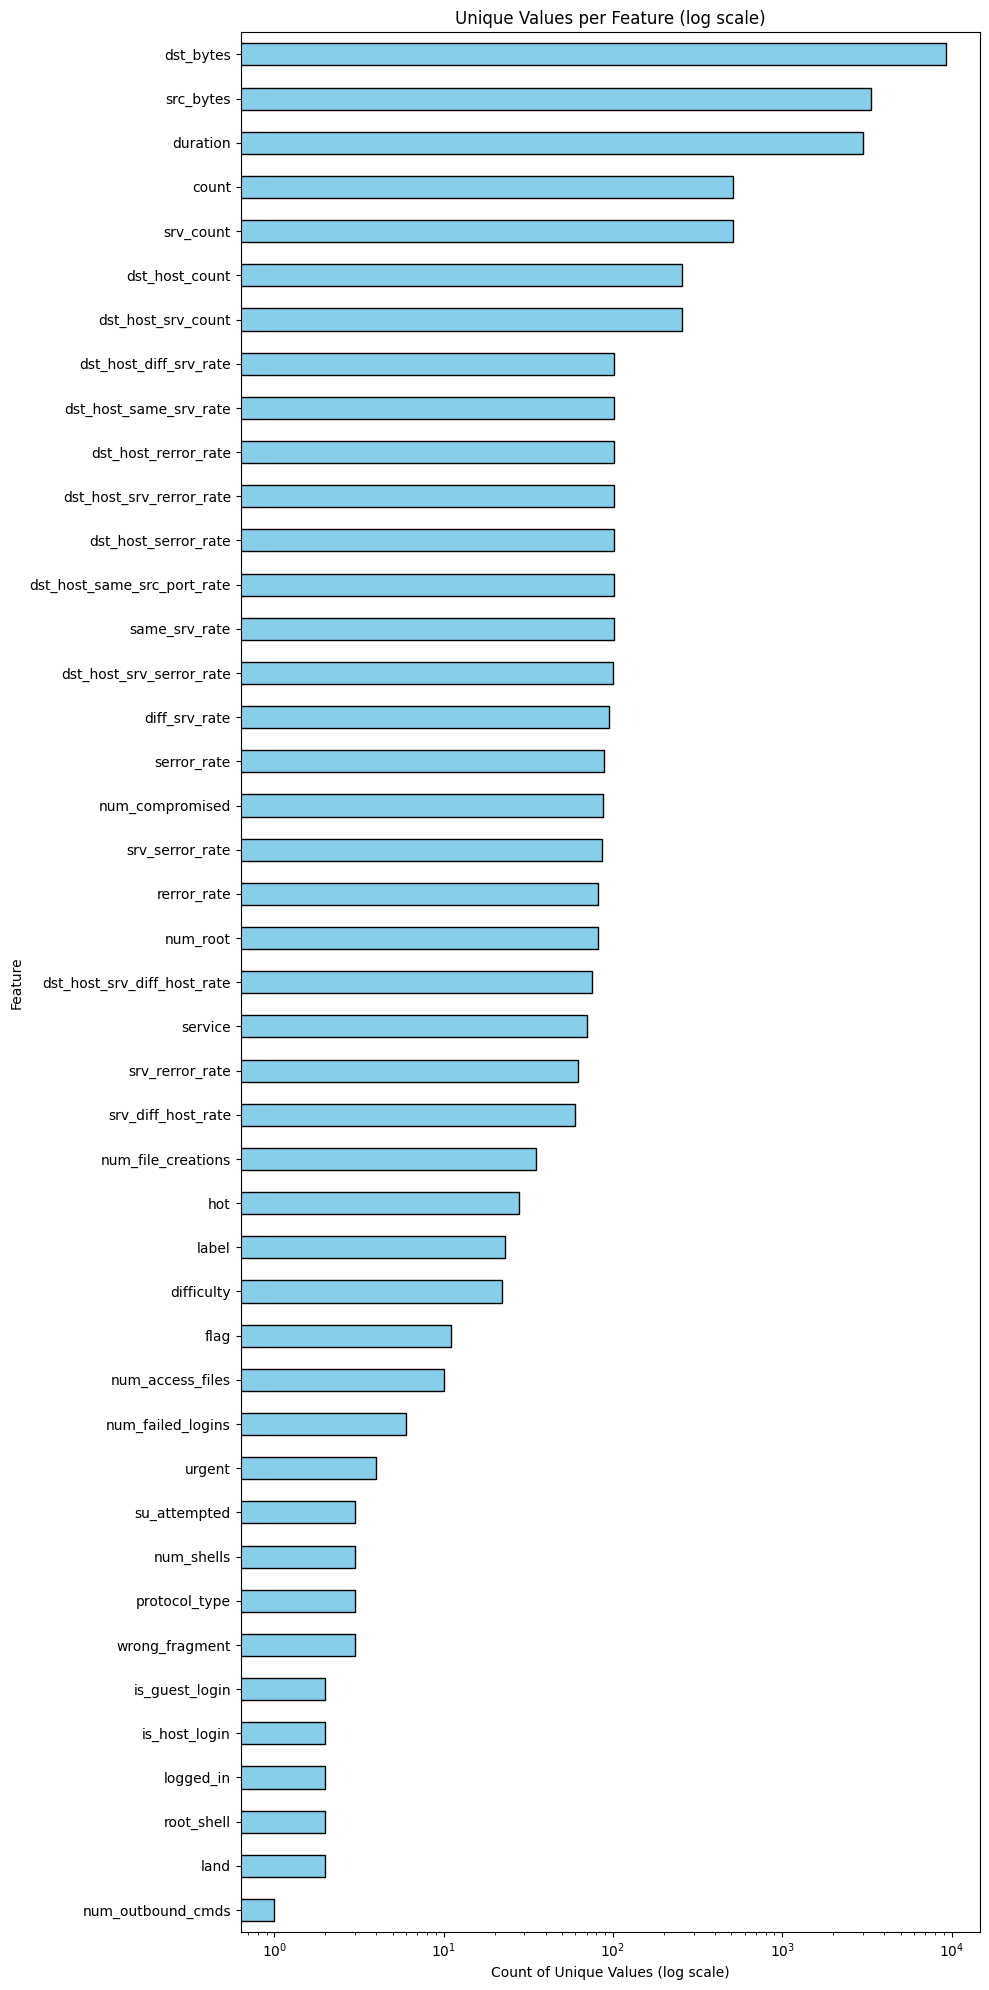

In [4]:
import matplotlib.pyplot as plt

# compute unique counts and sort
unique_counts = train_df.nunique().sort_values()

# plot horizontal bar with log scale
plt.figure(figsize=(10, 20))
ax = unique_counts.plot(
    kind='barh',
    color='skyblue',
    edgecolor='black',
    logx=True   # log scale on x-axis to handle the huge range
)
ax.set_title("Unique Values per Feature (log scale)")
ax.set_xlabel("Count of Unique Values (log scale)")
ax.set_ylabel("Feature")
plt.tight_layout()
plt.show()



- The dataset contains 41 features and one label column.
- Features are a mix of numeric (e.g., `src_bytes`, `dst_bytes`) and categorical (e.g., `protocol_type`, `service`, `flag`).
- No missing values detected.
- The `label` column indicates normal or specific attack types (DoS, Probe, U2R, R2L).
- No special placeholders (like "unknown" or "-999") found in key columns.


---

# 4. Data Statistics:

- ## Central Tendencies:

In [5]:
# Select numeric columns (drop 'difficulty')
numeric_features = train_df.select_dtypes(include='number').drop(columns='difficulty')

# Get full description and transpose
desc = numeric_features.describe().T

# Extract and rename only the columns you want
central_tendency = desc[['mean', 'std', 'min', '50%', 'max']].rename(columns={'50%': 'median'})

# Round for readability
central_tendency_rounded = central_tendency.round(3)

# Display final result
central_tendency_rounded.style.format(precision=3)


,mean,std,min,median,max
duration,287.145,2604.515,0.000,0.000,42908.000
src_bytes,45566.743,5870331.182,0.000,44.000,1379963888.000
dst_bytes,19779.114,4021269.151,0.000,0.000,1309937401.000
land,0.000,0.014,0.000,0.000,1.000
wrong_fragment,0.023,0.254,0.000,0.000,3.000
urgent,0.000,0.014,0.000,0.000,3.000
hot,0.204,2.150,0.000,0.000,77.000
num_failed_logins,0.001,0.045,0.000,0.000,5.000
logged_in,0.396,0.489,0.000,0.000,1.000
num_compromised,0.279,23.942,0.000,0.000,7479.000



The dataset contains a wide range of numerical features with varying scales.

Key observations:
- Features like `src_bytes` and `dst_bytes` have high variance and large max values (up to 1.3 billion), indicating some very large data transfers.
- Most features have a **median of 0**, such as `land`, `urgent`, `num_shells`, and `num_failed_logins`, showing that these events are rare or sparse.
- Features like `hot`, `num_compromised`, and `count` show more spread and variation, which may be important for distinguishing normal vs. malicious behavior.


- ## Correlation and Association:

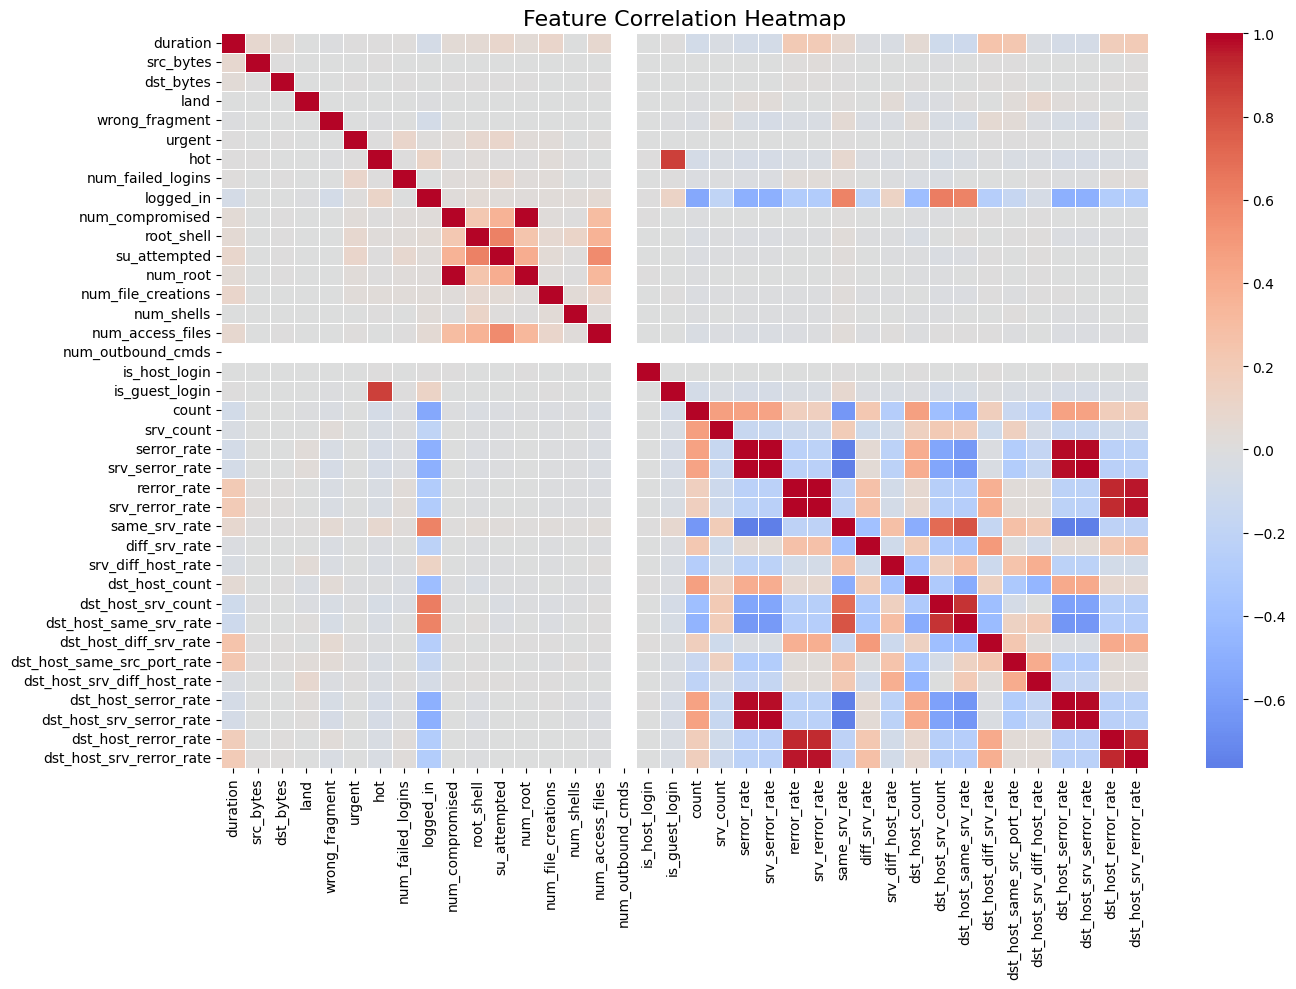

In [6]:
# Numeric features (already defined before)
correlation_matrix = numeric_features.corr()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.tight_layout()
plt.show()



The heatmap above shows Pearson correlation coefficients between all numerical features:

- **Strong Positive Correlations**  
  - `serror_rate`, `srv_serror_rate` and `dst_host_serror_rate` all correlate above 0.9—these measure similar error‐based behaviors and could be consolidated.  
  - Likewise, `rerror_rate` and `srv_rerror_rate` show high correlation (ρ > 0.8).

- **Weak or No Correlation**  
  - Many features (e.g., `duration`, `count`, `diff_srv_rate`) have correlations near zero with most other variables, indicating they provide unique information for modeling.

- **Constant Features**  
  - Columns like `urgent`, `land` and `num_outbound_cmds` are constant (zero variance), resulting in NaN correlations.

- **Implications for Feature Engineering**  
  - Highly correlated pairs suggest opportunities for dimensionality reduction (PCA) or manual feature grouping.  
  - Features with low inter‐correlation can be retained to maximize the information content of the model.

Overall, the correlation analysis identifies which features are redundant and which contribute distinct signal, guiding both feature selection and future dimensionality‐reduction efforts.


- ## Data Distribution:

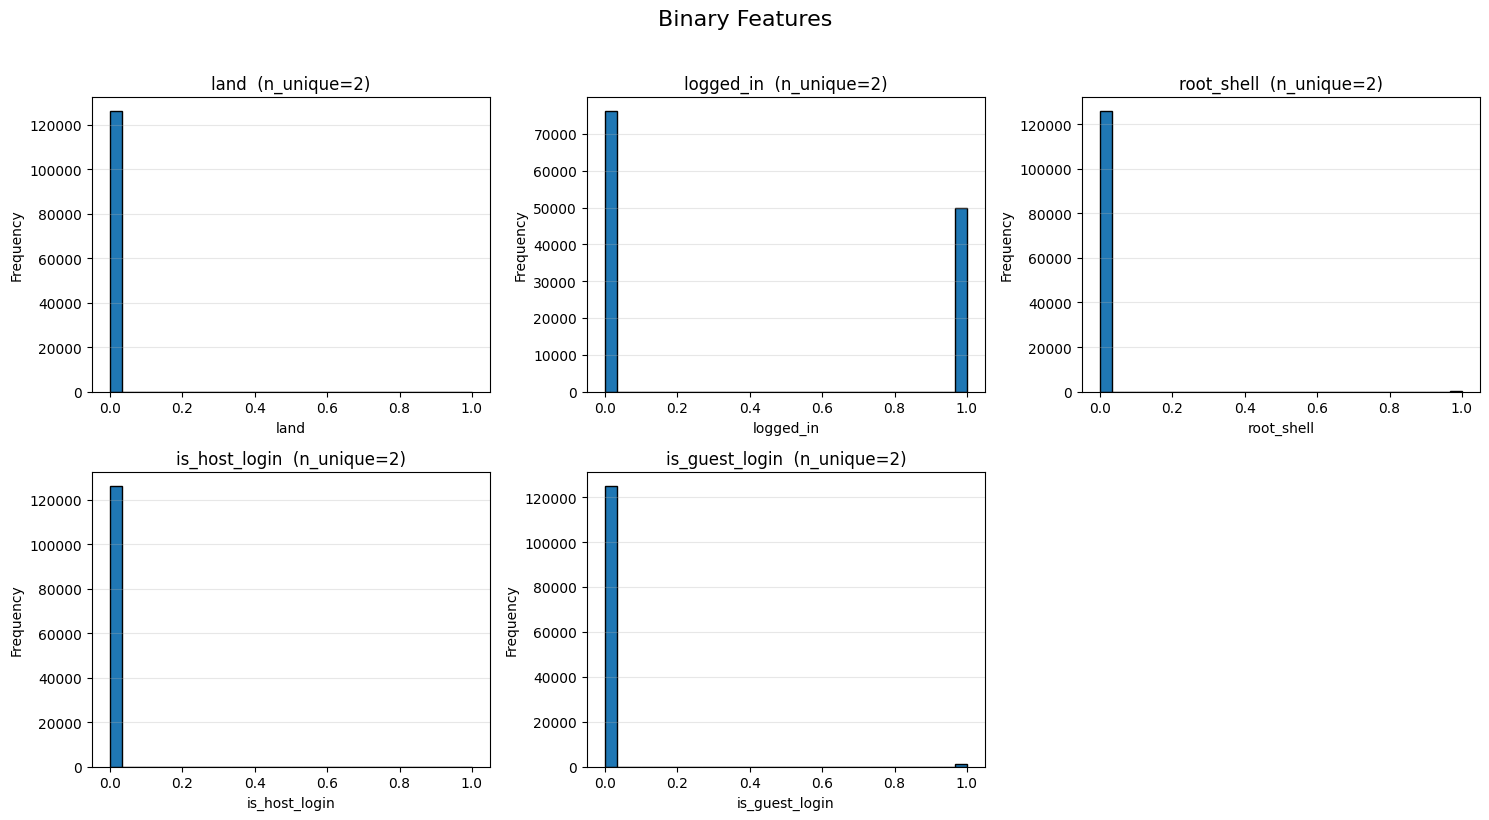

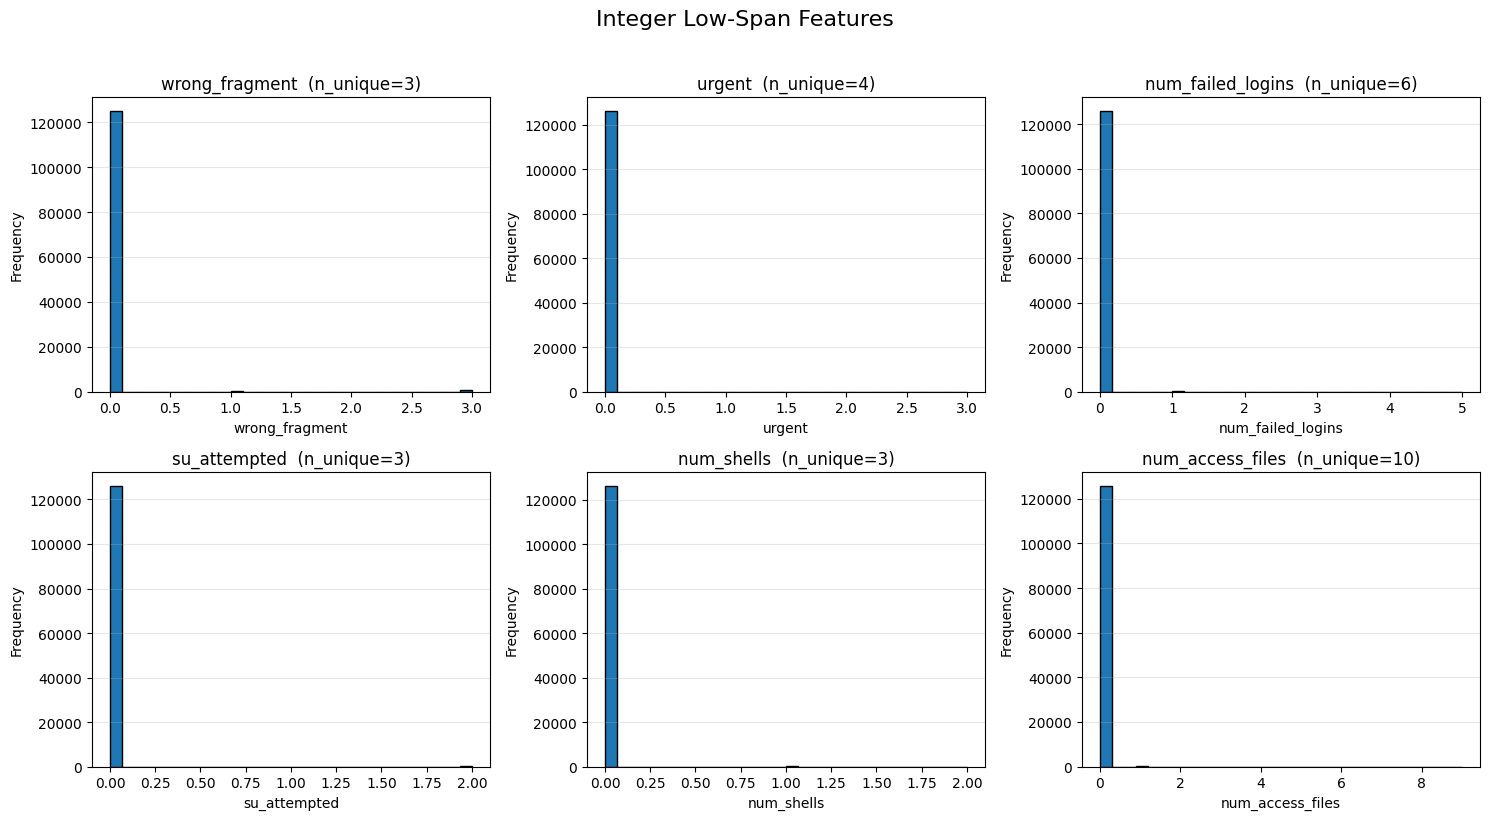

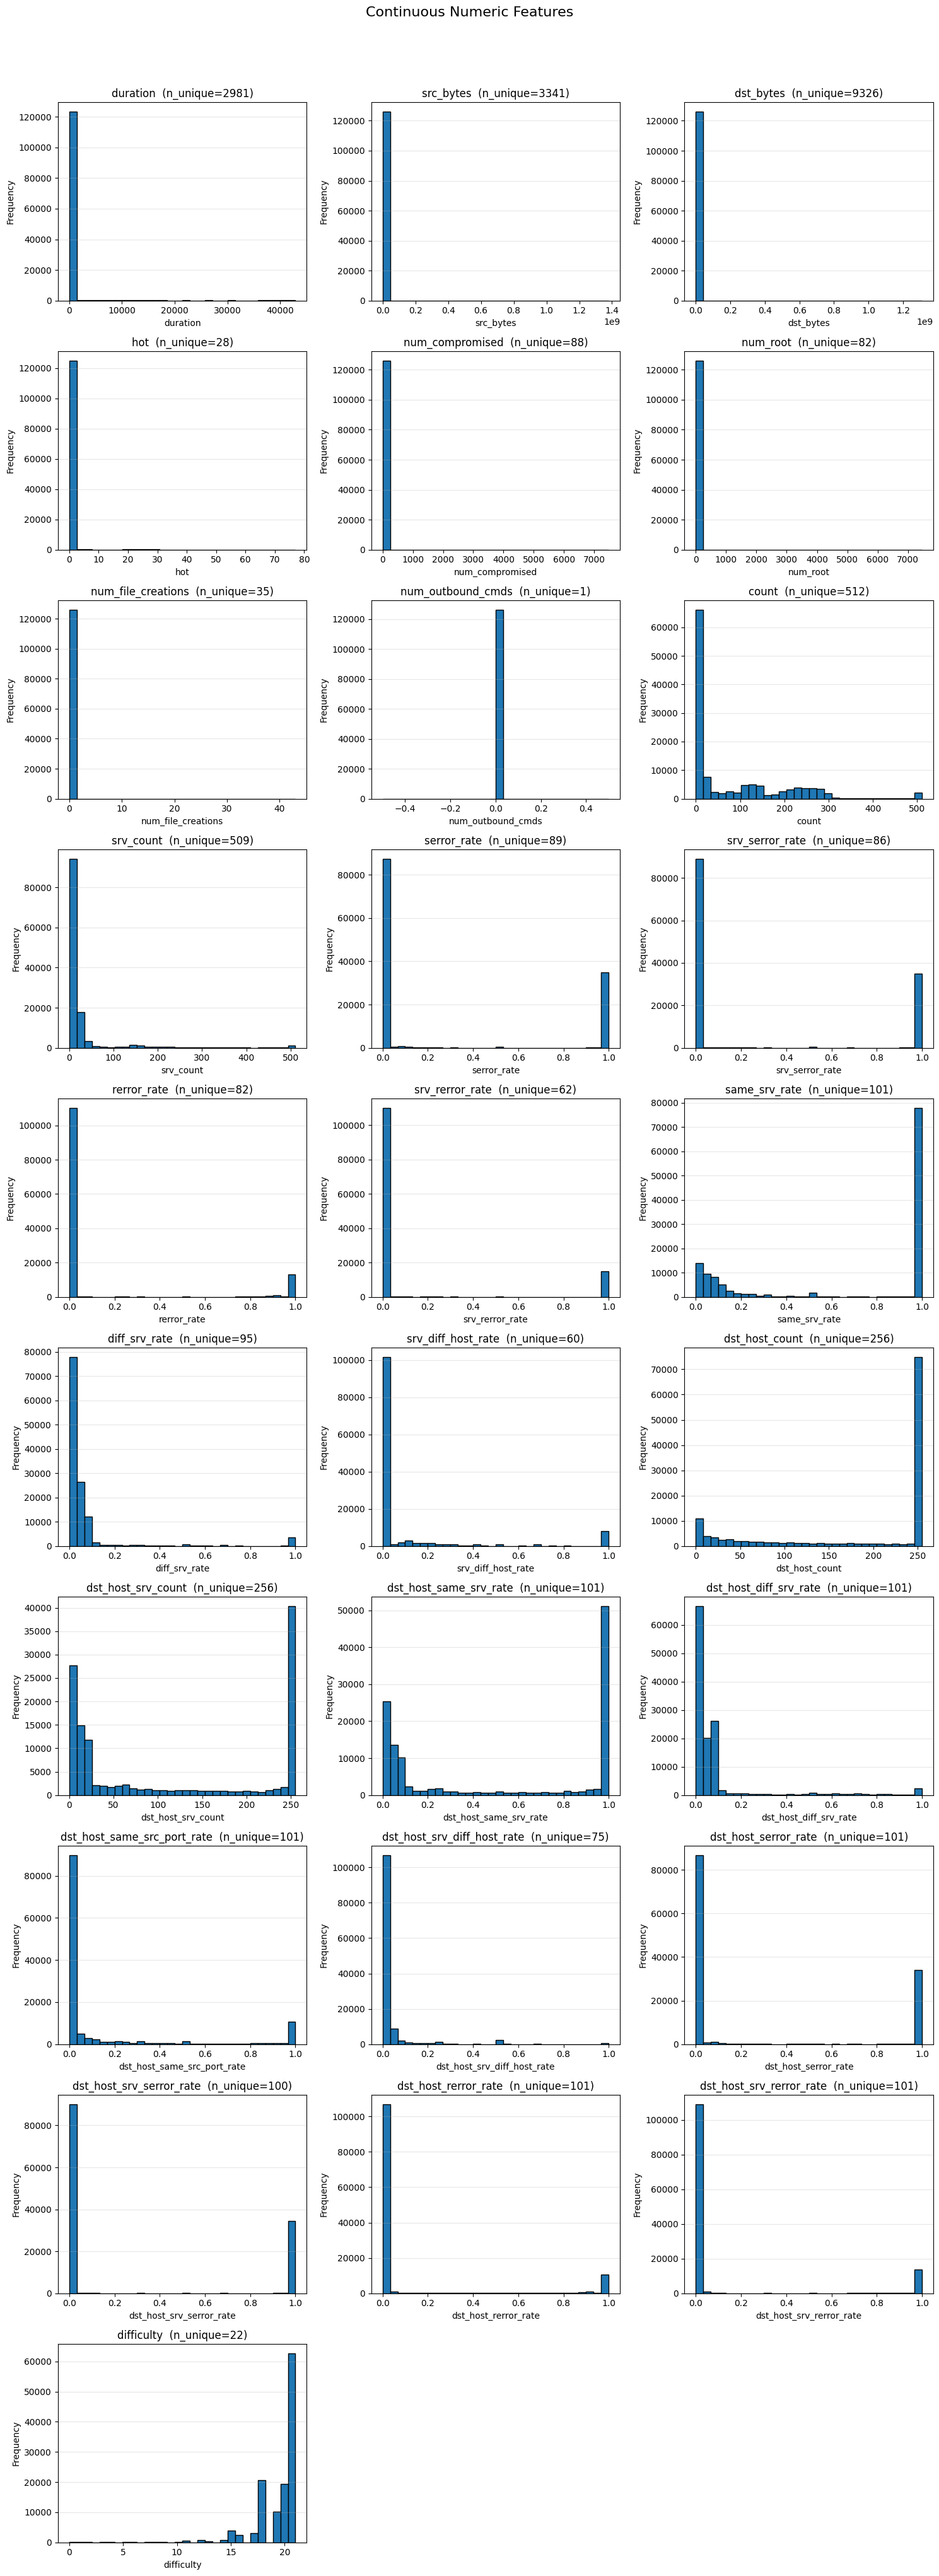

In [7]:
# ─── Histograms by Numeric Feature Type 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Identify all numeric columns
numeric_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()

# Binary features (exactly 2 unique values)
binary_cols = [
    c for c in numeric_cols
    if train_df[c].nunique(dropna=True) == 2
]

# Integer features with low cardinality (>2 but ≤10 unique values)
int_cols = [
    c for c in numeric_cols
    if pd.api.types.is_integer_dtype(train_df[c])
]
int_low_span_cols = [
    c for c in int_cols
    if 2 < train_df[c].nunique(dropna=True) <= 10 and c not in binary_cols
]

#  The rest are “continuous” / normal numeric
normal_numeric_cols = [
    c for c in numeric_cols
    if c not in binary_cols + int_low_span_cols
]

# Plot helper
def plot_feature_group(cols, title):
    if not cols:
        print(f"No features in group: {title}")
        return
    n = len(cols)
    ncols = 3
    nrows = int(np.ceil(n / ncols))
    plt.figure(figsize=(ncols*5, nrows*4))
    for i, col in enumerate(cols, 1):
        ax = plt.subplot(nrows, ncols, i)
        ax.hist(train_df[col].dropna(), bins=30, edgecolor='black')
        ax.set_title(f"{col}  (n_unique={train_df[col].nunique()})")
        ax.set_xlabel(col)
        ax.set_ylabel("Frequency")
        ax.grid(axis='y', alpha=0.3)
    plt.suptitle(title, y=1.02, fontsize=16)
    plt.tight_layout()
    plt.show()

# Generate the three plots
plot_feature_group(binary_cols,          "Binary Features")
plot_feature_group(int_low_span_cols,    "Integer Low-Span Features")
plot_feature_group(normal_numeric_cols,  "Continuous Numeric Features")


## Numeric Feature Distributions

### 1. Binary Features  
_All features with exactly two values (0/1):_  
- **land** (n_unique = 2) – almost entirely 0 (no “land” attacks in this split)  
- **logged_in** (n_unique = 2) – ~75 K zeros vs ~50 K ones  
- **root_shell** (n_unique = 2) – almost all 0, very few 1’s  
- **is_host_login** (n_unique = 2) – almost all 0, very few 1’s  
- **is_guest_login** (n_unique = 2) – ~125 K zeros vs ~2 K ones  

> **Insight:** These boolean flags are extremely imbalanced; most connections do not trigger them.

---

### 2. Integer “Low-Span” Features  
_Small-integer counts with 3–10 unique values:_  
- **wrong_fragment** (n_unique = 3)  
- **urgent** (n_unique = 4)  
- **num_failed_logins** (n_unique = 6)  
- **su_attempted** (n_unique = 3)  
- **num_shells** (n_unique = 3)  
- **num_access_files** (n_unique = 10)  

> **Insight:**  
> - Most of these counts are zero in >90% of records, with only a few connections showing non-zero activity.  
> - Features like `wrong_fragment` or `urgent` may still be valuable for catching rare, abnormal traffic bursts.

---

### 3. Continuous Numeric Features  
_All remaining numeric columns (many unique values):_  
- **duration** (n_unique = 2981)  
- **src_bytes** (n_unique = 3341)  
- **dst_bytes** (n_unique = 9326)  
- **hot** (n_unique = 28)  
- **num_file_creations** (n_unique = 35)  
- **count** (n_unique = 512)  
- **srv_count** (n_unique = 509)  
- **serror_rate** (n_unique = 89)  
- **srv_error_rate** (n_unique = 86)  
- **rerror_rate** (n_unique = 82)  
- **same_srv_rate** (n_unique = 101)  
- **diff_srv_rate** (n_unique = 95)  
- **srv_diff_host_rate** (n_unique = 60)  
- **dst_host_count** (n_unique = 256)  
- **dst_host_srv_count** (n_unique = 256)  
- **dst_host_same_srv_rate** (n_unique = 101)  
- **dst_host_srv_diff_host_rate** (n_unique = 75)  
- **dst_host_serror_rate** (n_unique = 101)  
- **dst_host_srv_error_rate** (n_unique = 101)  
- **difficulty** (n_unique = 22)  
- **lof_score** (n_unique = 119219)  

> **Insight:**  
> - Nearly all of these features are **heavily right-skewed**, with a large mass near zero and a long tail of high values.  
> - Some rates (e.g. `same_srv_rate`, `dst_host_same_srv_rate`) show **bimodal** patterns near 0 and near 1, indicating distinct normal vs anomalous usage modes.  


In [8]:
import numpy as np
import pandas as pd

# Identify numeric columns
numeric_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()

# Binary features (exactly 2 unique values)
binary_cols = [
    c for c in numeric_cols
    if train_df[c].nunique(dropna=True) == 2
]

# Integer low-span features (3–10 unique integer values)
int_low_span_cols = [
    c for c in numeric_cols
    if pd.api.types.is_integer_dtype(train_df[c])
       and 3 <= train_df[c].nunique(dropna=True) <= 10
]

# Continuous numeric features (the rest)
normal_numeric_cols = [
    c for c in numeric_cols
    if c not in binary_cols + int_low_span_cols
]

# Print binary feature distributions
print("=== Binary Feature Distributions ===")
for col in binary_cols:
    vc = train_df[col].value_counts().sort_index()
    pct = (vc / len(train_df) * 100).round(2)
    df_bin = pd.concat([vc.rename('count'), pct.rename('percent')], axis=1)
    print(f"\nFeature: {col}")
    print(df_bin)

# Print integer low-span feature distributions
print("\n=== Integer Low-Span Feature Distributions ===")
for col in int_low_span_cols:
    vc = train_df[col].value_counts().sort_index()
    pct = (vc / len(train_df) * 100).round(2)
    df_int = pd.concat([vc.rename('count'), pct.rename('percent')], axis=1)
    print(f"\nFeature: {col}")
    print(df_int)

# Print continuous numeric summary
print("\n=== Continuous Numeric Feature Summary ===")
desc = train_df[normal_numeric_cols].describe().T
print(desc[['count','mean','std','min','25%','50%','75%','max']])


=== Binary Feature Distributions ===

Feature: land
       count  percent
land                 
0     125948    99.98
1         25     0.02

Feature: logged_in
           count  percent
logged_in                
0          76121    60.43
1          49852    39.57

Feature: root_shell
             count  percent
root_shell                 
0           125804    99.87
1              169     0.13

Feature: is_host_login
                count  percent
is_host_login                 
0              125972    100.0
1                   1      0.0

Feature: is_guest_login
                 count  percent
is_guest_login                 
0               124786    99.06
1                 1187     0.94

=== Integer Low-Span Feature Distributions ===

Feature: wrong_fragment
                 count  percent
wrong_fragment                 
0               124883    99.13
1                  206     0.16
3                  884     0.70

Feature: urgent
         count  percent
urgent                 
0   

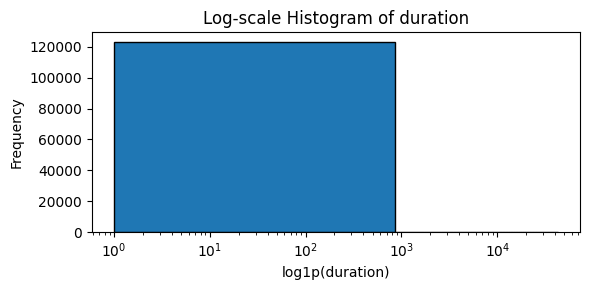

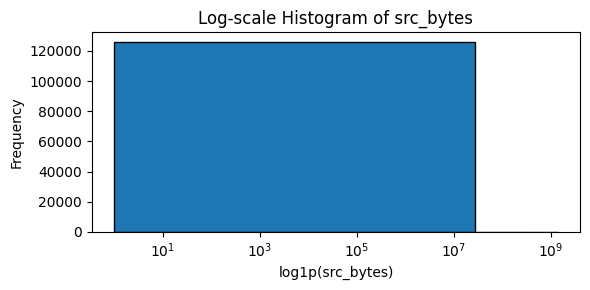

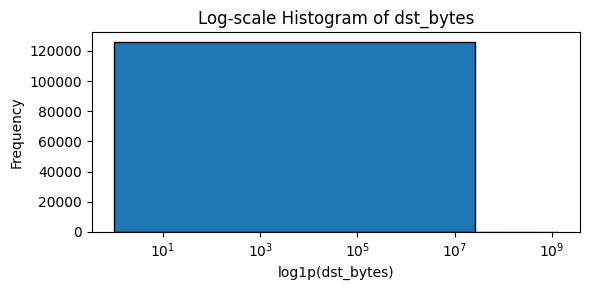

In [9]:
# example of log‐scale histogram for numeric features
for feat in ['duration','src_bytes','dst_bytes']:
    plt.figure(figsize=(6,3))
    plt.hist(train_df[feat] + 1, bins=50, edgecolor='k')  # +1 to avoid log(0)
    plt.xscale('log')
    plt.title(f"Log‐scale Histogram of {feat}")
    plt.xlabel(f"log1p({feat})")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


#### Log-Scale Distribution

Using a logarithmic x-axis for `duration`, `src_bytes`, and `dst_bytes`:

- **Low-end detail**: We see the fine structure of very short durations (1–100 s) and small transfers (10³–10⁵ bytes), which were **invisible** on a linear scale.
- **Tail compression**: The long right tail of large values is compressed, allowing us to view the entire data range in one plot.
- **Insight**: Most network sessions are brief and lightweight, with only a small proportion exhibiting large or prolonged activity.  


for example we can see that the `Duration` of most connections last under than 10^2, which is under 2 minutes, while most of the transfers(`src_bytes` and `dst_bytes`) under 10^5 bytes

#### Attack Category Mapping

Below is how each specific attack name in the `label` column maps to the four main intrusion categories:

- **DoS (Denial of Service):**  
  `back`, `land`, `neptune`, `pod`, `smurf`, `teardrop`

- **Probe (Surveillance & Scanning):**  
  `ipsweep`, `nmap`, `portsweep`, `satan`

- **R2L (Remote to Local):**  
  `ftp_write`, `guess_passwd`, `imap`, `multihop`, `phf`, `spy`, `warezclient`, `warezmaster`

- **U2R (User to Root):**  
  `buffer_overflow`, `loadmodule`, `perl`, `rootkit`

> We will use this mapping later for clustering and classification tasks.  
> For now, the `label` column remains as the raw attack names.  


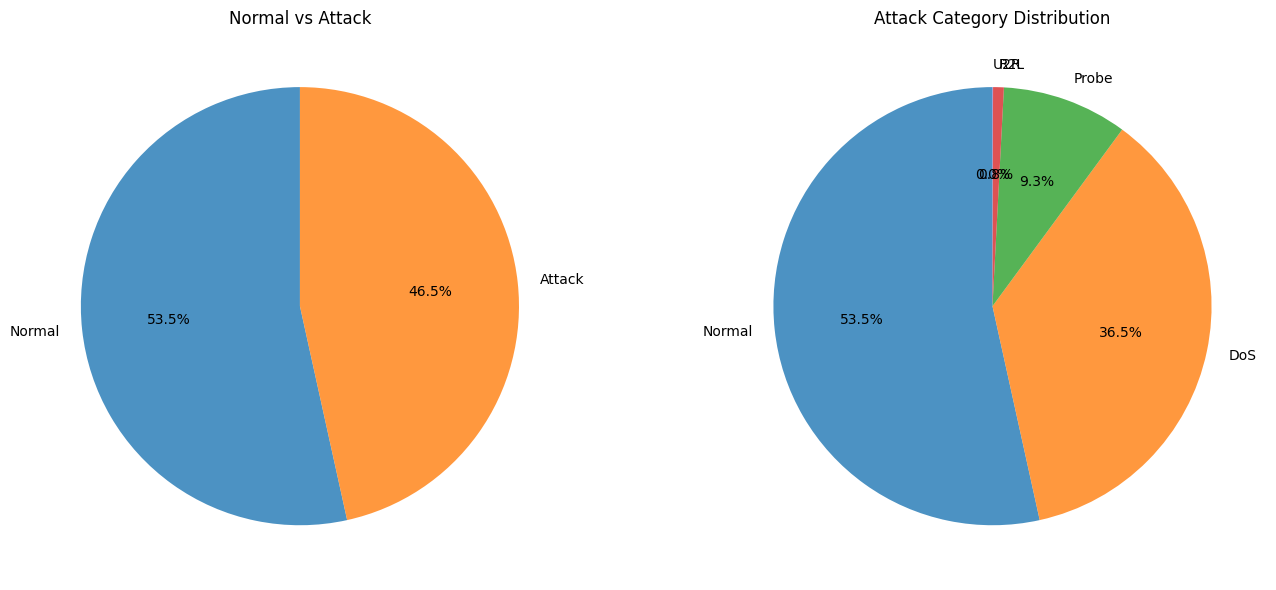

In [12]:


import matplotlib.pyplot as plt

attack_mapping = {
    'back':'DoS','land':'DoS','neptune':'DoS','pod':'DoS','smurf':'DoS','teardrop':'DoS',
    'ipsweep':'Probe','nmap':'Probe','portsweep':'Probe','satan':'Probe',
    'ftp_write':'R2L','guess_passwd':'R2L','imap':'R2L','multihop':'R2L','phf':'R2L',
    'spy':'R2L','warezclient':'R2L','warezmaster':'R2L',
    'buffer_overflow':'U2R','loadmodule':'U2R','perl':'U2R','rootkit':'U2R',
    'normal':'Normal'
}

# Create the 'attack_category' column in train_df
train_df['attack_category'] = train_df['label'].map(attack_mapping)

# Binary counts: Normal vs Attack
binary_counts = (
    train_df['label']
    .apply(lambda x: 'Normal' if x=='normal' else 'Attack')
    .value_counts()
)

# Multiclass counts: all attack categories (including Normal)
category_counts = train_df['attack_category'].value_counts()

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# Pie #1: Normal vs Attack
axes[0].pie(
    binary_counts,
    labels=binary_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'alpha':0.8}
)
axes[0].set_title('Normal vs Attack')

# Pie #2: Attack Categories
axes[1].pie(
    category_counts,
    labels=category_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'alpha':0.8}
)
axes[1].set_title('Attack Category Distribution')

plt.tight_layout()
plt.show()


In [13]:
# Binary: Normal vs Attack
binary_counts = train_df['label'] \
    .apply(lambda x: 'Normal' if x=='normal' else 'Attack') \
    .value_counts()
binary_percents = (binary_counts / len(train_df) * 100).round(2)

print("Normal vs Attack Distribution:")
print(pd.concat([binary_counts.rename('count'),
                 binary_percents.rename('percent')], axis=1))
print("\n")

# Multiclass: Attack Categories
category_counts = train_df['attack_category'].value_counts()
category_percents = (category_counts / len(train_df) * 100).round(2)

print("Attack Category Distribution:")
print(pd.concat([category_counts.rename('count'),
                 category_percents.rename('percent')], axis=1))


Normal vs Attack Distribution:
        count  percent
label                 
Normal  67343    53.46
Attack  58630    46.54


Attack Category Distribution:
                 count  percent
attack_category                
Normal           67343    53.46
DoS              45927    36.46
Probe            11656     9.25
R2L                995     0.79
U2R                 52     0.04


## Feature Distributions by Attack Category

Below is a grid of stacked histograms for **every numeric feature**, colored by `attack_category` (Normal, DoS, Probe, R2L, U2R).


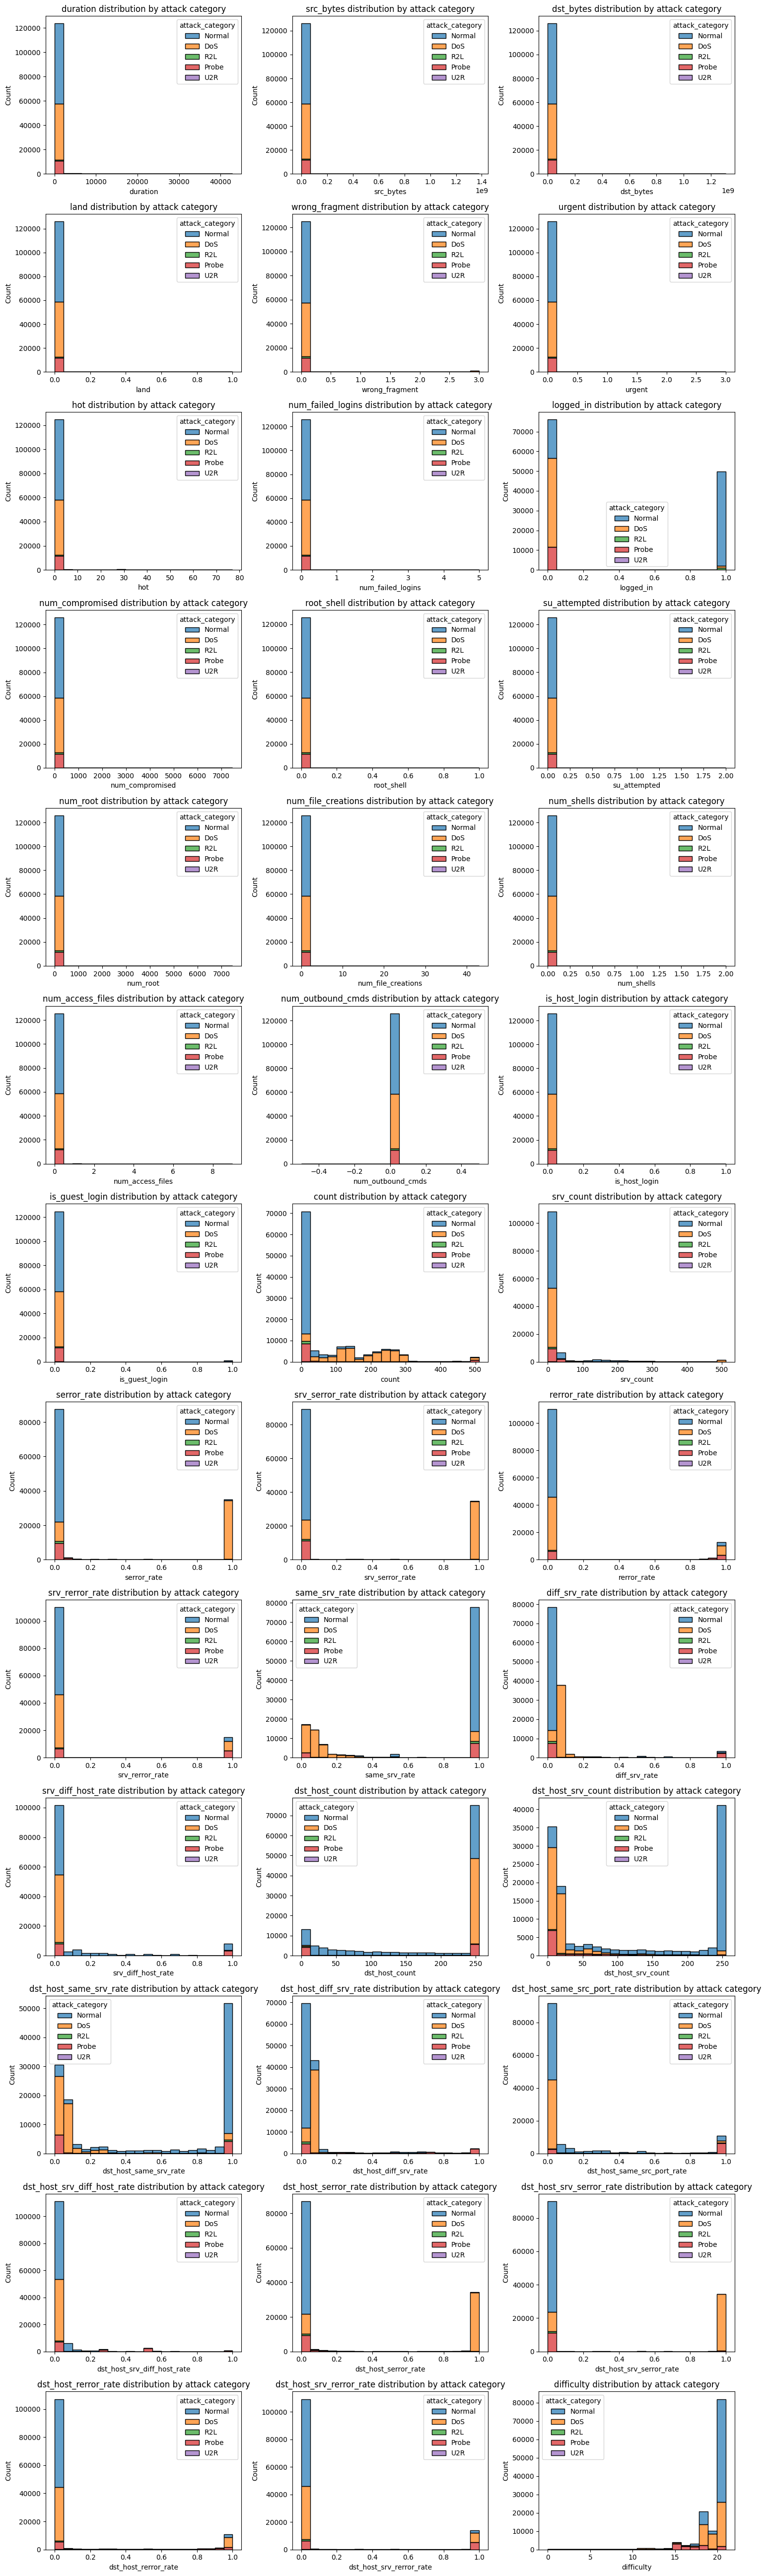

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# all numeric feature names
numeric_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()

# Set up grid dimensions
n = len(numeric_cols)
ncols = 3
nrows = int(np.ceil(n / ncols))
plt.figure(figsize=(ncols * 5, nrows * 4))

# Loop and plot
for i, col in enumerate(numeric_cols, start=1):
    ax = plt.subplot(nrows, ncols, i)
    sns.histplot(
        data=train_df,
        x=col,
        hue='attack_category',      # uses mapped categories: Normal, DoS, Probe, R2L, U2R
        multiple='stack',           # stacks the bars by category
        bins=20,
        edgecolor='black',
        alpha=0.7,
        ax=ax
    )
    ax.set_title(f"{col} distribution by attack category")
    ax.set_xlabel(col)
    ax.set_ylabel("Count")

plt.tight_layout()
plt.show()


- ### Missing & Special Values:


In [15]:
# Check for missing values
missing_counts = train_df.isnull().sum()
print("Missing values per column:")
print(missing_counts[missing_counts > 0] if missing_counts.any() else "No missing values found.")

# Check for common placeholder values in object columns
placeholder_values = ['?', 'unknown', '-1', '-999']
for ph in placeholder_values:
    total = (train_df == ph).sum().sum()
    if total > 0:
        print(f"Found {total} occurrences of placeholder '{ph}'")

# Show unique counts for object columns to spot anything odd
for col in train_df.select_dtypes(include='object').columns:
    print(f"\nColumn `{col}` unique values (sample): {train_df[col].unique()[:10]}")


Missing values per column:
No missing values found.

Column `protocol_type` unique values (sample): ['tcp' 'udp' 'icmp']

Column `service` unique values (sample): ['ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet']

Column `flag` unique values (sample): ['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2']

Column `label` unique values (sample): ['normal' 'neptune' 'warezclient' 'ipsweep' 'portsweep' 'teardrop' 'nmap'
 'satan' 'smurf' 'pod']

Column `attack_category` unique values (sample): ['Normal' 'DoS' 'R2L' 'Probe' 'U2R']


- **Missing values:**  
  No missing values were detected in any column.

- **Special placeholders:**  
  We searched for common placeholders (`'?'`, `'unknown'`, `'-1'`, `'-999'`) and found **none**.

- **Unique checks:**  
  Object‐type columns (e.g. `protocol_type`, `service`, `flag`, `label`) contain only valid domain values without any placeholder artifacts.

The dataset is therefore clean with respect to missing or special placeholder values, and no imputation is required at this stage.


- ### Duplication, Single-Value & Multi-Value Features:


In [16]:
# Check for duplicate rows
dup_count = train_df.duplicated().sum()
print(f"Duplicate rows in training set: {dup_count}")

# Compute unique value counts per column
unique_counts = train_df.nunique().sort_values()

# Identify constant (single-value) columns
single_valued = unique_counts[unique_counts == 1].index.tolist()
print("\nSingle-value (constant) columns:")
print(single_valued)

#  Identify high-cardinality (multi-valued) columns
#  Here we flag any column with more than 1,000 unique values
multi_valued = unique_counts[unique_counts > 1000].index.tolist()
print("\nHigh-cardinality (multi-valued) columns (>1,000 unique):")
print(multi_valued)


Duplicate rows in training set: 0

Single-value (constant) columns:
['num_outbound_cmds']

High-cardinality (multi-valued) columns (>1,000 unique):
['duration', 'src_bytes', 'dst_bytes']


- **Duplicate rows:**  
  There are **0 duplicate rows** in the training set, confirming full row‐level uniqueness.

- **Constant column:**  
  - `num_outbound_cmds` has only **1 unique value** and never varies.
  This feature can be dropped during feature selection.

- **High-cardinality features:**  
  - The following numeric columns each have **>1,000 unique values** and capture continuous behaviors:  
    `duration`, `src_bytes`, `dst_bytes`  
  These will likely require transformation (e.g. log-scaling, binning) in preprocessing to handle their wide range.

- ### Dimensionality Reduction with PCA:


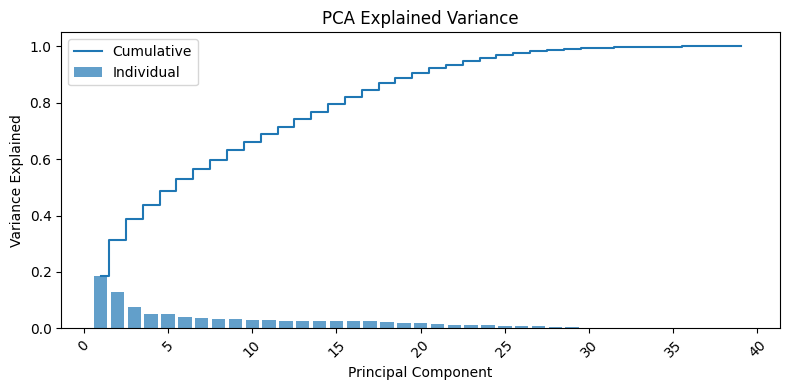

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Prepare data: drop difficulty, scale all numeric features
num_feats = train_df.select_dtypes(include='number').drop(columns=['difficulty'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(num_feats)

# run PCA
pca = PCA()
pca.fit(X_scaled)

# Gather explained variance
explained = pca.explained_variance_ratio_
cumulative = explained.cumsum()

# Plot individual vs. cumulative variance
plt.figure(figsize=(8,4))
plt.bar(range(1, len(explained)+1), explained, alpha=0.7, label='Individual')
plt.step(range(1, len(cumulative)+1), cumulative, where='mid', label='Cumulative')
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.title("PCA Explained Variance")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


To assess redundancy, we applied PCA on our 41 scaled numeric features:

- The **bar chart** shows variance explained by each principal component.
- The **step plot** shows cumulative variance; for example, the first 5 components explain about 50% of total variance.
- This indicates we can **reduce dimensionality** to a much smaller subspace (e.g. 10–15 components) without losing most information.
- In later modeling, using PCA or feature‐selection will speed up training and help avoid multicollinearity.

By actually running PCA, we’ve confirmed which features carry overlapping information and how aggressively we can compress the feature space.


#### Redundant Features & Drop Candidates:

Based on our correlation heatmap and PCA analysis, several groups of features carry almost identical information. We can simplify the feature set by selecting one representative from each cluster and removing the rest:

- **Error‐rate group (session vs. host):**  
  - `serror_rate`, `srv_serror_rate`, `dst_host_serror_rate`, `dst_host_srv_serror_rate`  
  - *Keep:* `serror_rate`  
  - *Drop:* `srv_serror_rate`, `dst_host_serror_rate`, `dst_host_srv_serror_rate`

- **Reverse‐error‐rate group:**  
  - `rerror_rate`, `srv_rerror_rate`, `dst_host_rerror_rate`, `dst_host_srv_rerror_rate`  
  - *Keep:* `rerror_rate`  
  - *Drop:* `srv_rerror_rate`, `dst_host_rerror_rate`, `dst_host_srv_rerror_rate`

- **Same‐service rate:**  
  - `same_srv_rate`, `dst_host_same_srv_rate`  
  - *Keep:* `same_srv_rate`  
  - *Drop:* `dst_host_same_srv_rate`

- **Different‐service rate:**  
  - `diff_srv_rate`, `dst_host_diff_srv_rate`  
  - *Keep:* `diff_srv_rate`  
  - *Drop:* `dst_host_diff_srv_rate`

- **Count features:**  
  - `count` and `srv_count` show moderate correlation (~0.7). You can choose to drop `srv_count` if you need to reduce dimensionality further.

- **Constant:**  
  - `num_outbound_cmds` is entirely constant → drop  

By pruning these redundant and low‐value columns, we’ll reduce model complexity and speed up training without sacrificing predictive information.
So, we will implement this step when we need it later before training the model...  


---

# 5. Abnormality Detection:


In [ ]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

# Single-Feature Outliers

# Duration
dur = train_df['duration']
mean_dur, std_dur = dur.mean(), dur.std()
thr_dur_high = mean_dur + 3 * std_dur
thr_dur_low = dur[dur > 0].quantile(0.01)

duration_outliers_high = train_df[dur > thr_dur_high]
duration_outliers_low = train_df[(dur > 0) & (dur < thr_dur_low)]
print(f"\nDuration outliers:")
print(f"High-duration outliers (> mean+3σ = {thr_dur_high:.1f} s): {len(duration_outliers_high)}")

display(duration_outliers_high[['duration', 'service', 'label']].head(3))


print(f"Very short non-zero durations (<1st percentile = {thr_dur_low:.1f} s): {len(duration_outliers_low)}\n")
display(duration_outliers_low[['duration', 'service', 'label']].head(3))


# src_bytes
sb = train_df['src_bytes']
mean_sb, std_sb = sb.mean(), sb.std()
thr_sb_high = mean_sb + 3 * std_sb

sb_outliers_high = train_df[sb > thr_sb_high]
print(f"\nSource bytes outliers:")
print(f"\nHigh-src_bytes outliers (> mean+3σ = {thr_sb_high:.1f} bytes): {len(sb_outliers_high)}")
display(sb_outliers_high[['src_bytes', 'service', 'label']].head(3))



Duration outliers:
High-duration outliers (> mean+3σ = 8100.7 s): 1431


,duration,service,label
43,9052,other,normal
115,25950,private,portsweep
165,9015,other,portsweep


Very short non-zero durations (<1st percentile = 1.0 s): 0



,duration,service,label



Source bytes outliers:

High-src_bytes outliers (> mean+3σ = 17656560.3 bytes): 11


,src_bytes,service,label
1038,381709090,telnet,portsweep
43486,621568663,discard,portsweep
44527,1167519497,private,portsweep


### Single-Feature Outliers
- **High durations:** Sessions with `duration > mean+3σ` (threshold ≈ 8100.7s) – **1431** outliers detected.
- **Very short non-zero durations:** Sessions under the 1st percentile (threshold ≈ 1s) – **0** outliers detected.
- **High src_bytes:** Connections with `src_bytes > mean+3σ` (threshold ≈ 17,656,560.3 bytes) – **11** outliers detected.


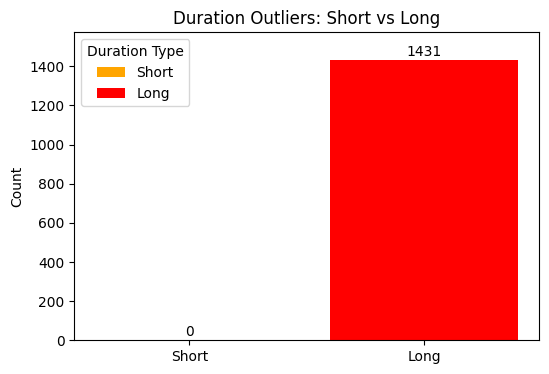

In [ ]:
# get counts
count_long  = train_df[dur > thr_dur_high].shape[0]
count_short = train_df[(dur > 0) & (dur < thr_dur_low)].shape[0]

# prepare data
types  = ['Short', 'Long']
counts = [count_short, count_long]

# plot
plt.figure(figsize=(6,4))
bars = plt.bar(types, counts, color=['orange','red'])
plt.title('Duration Outliers: Short vs Long')
plt.ylabel('Count')

# annotate each bar with its count
for bar, cnt in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width()/2, cnt + 5, str(cnt), 
             ha='center', va='bottom')

plt.ylim(0, max(counts)*1.1)
bars = plt.bar(types, counts, color=['orange','red'])
plt.legend(bars, ['Short','Long'], title='Duration Type')
plt.show()

In [ ]:
# Multi-Feature Outliers 

# Prepare scaled numeric features (exclude difficulty)
from sklearn.preprocessing import StandardScaler
num_feats = train_df.select_dtypes(include='number').drop(columns=['difficulty'])
X_scaled = StandardScaler().fit_transform(num_feats)

# Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=50, contamination=0.005)
y_pred = lof.fit_predict(X_scaled)   # –1 for outliers, 1 for inliers
lof_outliers = train_df[y_pred == -1]

print(f"LOF (n_neighbors=50) detected {len(lof_outliers)} multivariate outliers")
display(lof_outliers[['duration','src_bytes','dst_bytes','service','label']].head(5))



LOF (n_neighbors=50) detected 630 multivariate outliers


,duration,src_bytes,dst_bytes,service,label
123,240,328,275,http,normal
256,0,168,9551,http,normal
501,0,172,12793,http,normal
833,0,213,259,http,normal
1038,35682,381709090,0,telnet,portsweep


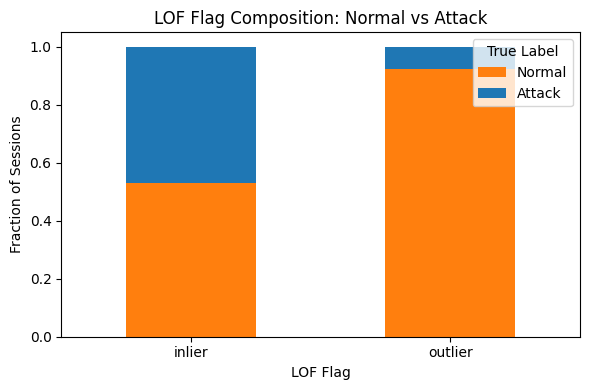

In [ ]:
# Voisals:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df_lof = train_df.copy()
# flag from your LOF run: –1 → 'outlier', +1 → 'inlier'
df_lof['lof_flag'] = np.where(y_pred == -1, 'outlier', 'inlier')

# collapse true attack_category into binary Normal/Attack
df_lof['binary_label'] = df_lof['attack_category'].apply(
    lambda x: 'Normal' if x == 'Normal' else 'Attack'
)

# compute fraction of Normal vs Attack within each LOF flag
comp_lof = pd.crosstab(
    df_lof['lof_flag'],
    df_lof['binary_label'],
    normalize='index'
).loc[['inlier','outlier'], ['Normal','Attack']]

# plot stacked bar
ax = comp_lof.plot(
    kind='bar',
    stacked=True,
    figsize=(6,4),
    color=['#ff7f0e','#1f77b4']  # orange for Normal, blue for Attack
)
ax.set_title("LOF Flag Composition: Normal vs Attack")
ax.set_xlabel("LOF Flag")
ax.set_ylabel("Fraction of Sessions")
ax.legend(title="True Label", loc='upper right')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### Multi-Feature Outliers
- **Local Outlier Factor (LOF):** Applied to all scaled numeric features with 1% contamination, detecting **630** multivariate anomalies.
- The stacked bar chart above show flags by their true Normal vs Attack label:

- **Inliers (LOF = +1):**  
  - ~53% Normal (benign) traffic  
  - ~47% Attack traffic  
  Despite being labeled “inliers,” nearly half of attack sessions remain undetected at this threshold, reflecting LOF’s tendency to classify borderline malicious patterns as normal.

- **Outliers (LOF = –1):**  
  - ~92% Attack sessions  
  - ~ 8% Normal sessions  
  LOF concentrates most of the true attacks into the outlier bucket, demonstrating strong anomaly signal—but at the cost of misclassifying a small fraction of benign sessions.


### Domain Explanation

- **Long‐lived, high‐volume sessions:**  
  Connections that persist far beyond the typical user session (e.g. duration > mean + 3σ) and move tens of megabytes of data often correspond to malicious activity—such as broad port‐scanning campaigns, stealthy data exfiltration tunnels, or volumetric DoS floods intended to saturate network or server resources.

- **Very short, non‐zero sessions:**  
  Extremely brief sessions (just a few milliseconds or seconds) typically indicate reconnaissance or failed handshake attempts. Attackers frequently open a connection to check for an active service (e.g. SYN scans or quick probes) and then immediately close it, resulting in sub‐threshold durations that fall below normal usage patterns.

- **Multivariate anomalies (LOF):**  
  Some attacks hide in plain sight by keeping each individual metric within normal bounds—but combining them yields an unusual pattern. Local Outlier Factor exposes these subtle deviations (for example, a session with slightly elevated error rates across several features, an uncommon service flag, and moderate byte volume) that simple thresholds would miss. This captures “low-and-slow” exfiltration, command-and-control beaconing, or zero-day exploits that evade single‐feature detectors.


---

# 6. Clustering:

## K-Means approach:
-  (Attack catagory type) (not so good, i will keep it for demonstration for now...)


In [17]:
# K-Means Clustering Baseline with k=5

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Attack category mapping
attack_mapping = {
    'back':'DoS','land':'DoS','neptune':'DoS','pod':'DoS','smurf':'DoS','teardrop':'DoS',
    'ipsweep':'Probe','nmap':'Probe','portsweep':'Probe','satan':'Probe',
    'ftp_write':'R2L','guess_passwd':'R2L','imap':'R2L','multihop':'R2L','phf':'R2L',
    'spy':'R2L','warezclient':'R2L','warezmaster':'R2L',
    'buffer_overflow':'U2R','loadmodule':'U2R','perl':'U2R','rootkit':'U2R',
    'normal':'Normal'
}

# Prepare the dataset
df = train_df.copy()
df['attack_category'] = df['label'].map(attack_mapping)

y_true = pd.Categorical(df['attack_category']).codes

# Build feature matrix: drop label/difficulty/attack_category, one-hot encode categoricals
X_num = df.drop(columns=['label','difficulty','attack_category'])
X = pd.get_dummies(X_num, columns=['protocol_type','service','flag'], drop_first=True)

# Scale and PCA‐reduce
X_scaled = StandardScaler().fit_transform(X)
X_pca = PCA(n_components=25, random_state=42).fit_transform(X_scaled)

# Fit K-Means
km = KMeans(n_clusters=5, random_state=42, n_init=10)
km_labels = km.fit_predict(X_pca)



# Evaluate
sil = silhouette_score(X_pca, km_labels)
ari = adjusted_rand_score(y_true, km_labels)
composition = pd.crosstab(km_labels, df['attack_category'], normalize='index').round(3)

print("K-Means Baseline (k=5)")
print(f"- Silhouette Score: {sil:.3f}")
print(f"- Adjusted Rand Index: {ari:.3f}\n")
print("Cluster composition (fraction per attack_category):")
display(composition)


K-Means Baseline (k=5)
- Silhouette Score: 0.434
- Adjusted Rand Index: 0.555

Cluster composition (fraction per attack_category):


attack_category,DoS,Normal,Probe,R2L,U2R
row_0,,,,,
0,0.985,0.002,0.013,0.000,0.000
1,0.018,0.960,0.003,0.018,0.001
2,0.195,0.713,0.091,0.000,0.000
3,0.456,0.195,0.346,0.003,0.000
4,0.015,0.092,0.893,0.001,0.000


In [18]:
# lets show which cluster corresponds to which attack category

# add cluster labels to DataFrame for analysis
df['kmeans_cluster'] = km_labels

# Compute the majority attack_category for each cluster
cluster_map = (
    df
    .groupby('kmeans_cluster')['attack_category']
    .agg(lambda x: x.value_counts().idxmax())
    .to_dict()
)

# Print it out
for cluster_id, category in cluster_map.items():
    print(f"Cluster {cluster_id} → {category}")


Cluster 0 → DoS
Cluster 1 → Normal
Cluster 2 → Normal
Cluster 3 → DoS
Cluster 4 → Probe


C:\Users\Basel\AppData\Local\Temp\ipykernel_19472\830647376.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


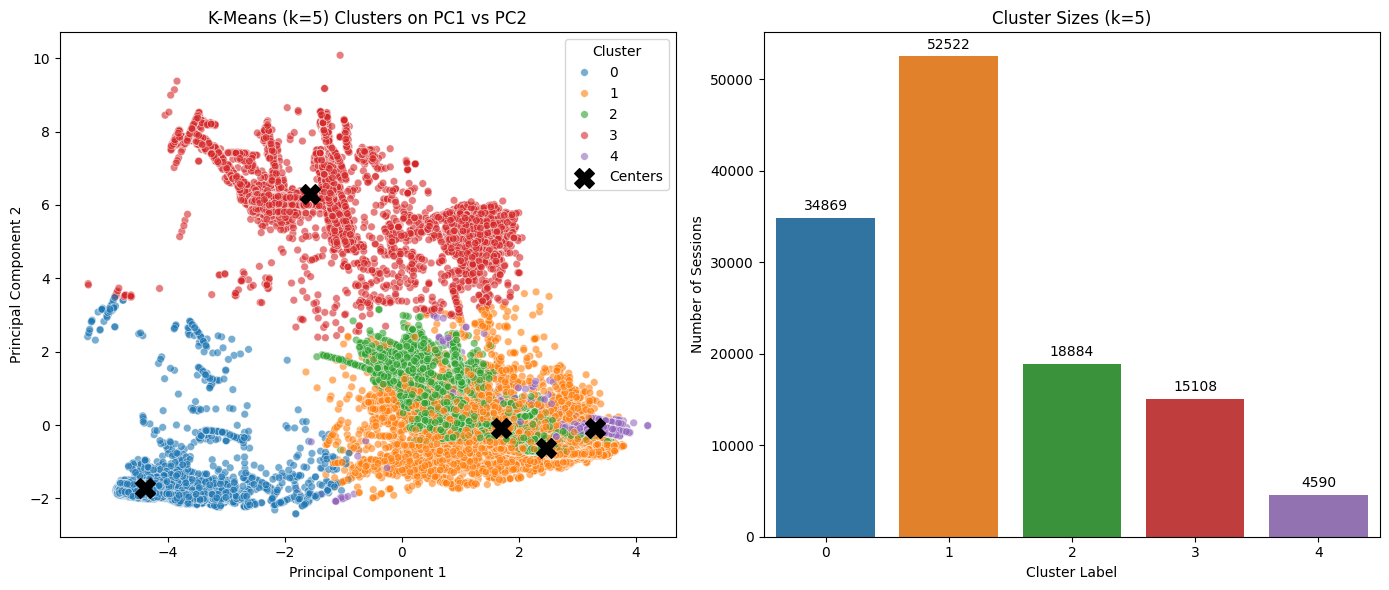

In [19]:
# Visuals:
import matplotlib.pyplot as plt
import seaborn as sns   
# Scatter of first two principal components
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(
    x=X_pca[:, 0], y=X_pca[:, 1],
    hue=km_labels,
    palette="tab10",
    alpha=0.6,
    s=30,
    ax=ax1
)
# plot cluster centers
centers = km.cluster_centers_
ax1.scatter(
    centers[:, 0], centers[:, 1],
    c="black", s=200, marker="X",
    label="Centers"
)
ax1.set_title("K-Means (k=5) Clusters on PC1 vs PC2")
ax1.set_xlabel("Principal Component 1")
ax1.set_ylabel("Principal Component 2")
ax1.legend(title="Cluster", loc="upper right")

# 2) Bar chart of cluster sizes
cluster_sizes = pd.Series(km_labels).value_counts().sort_index()
sns.barplot(
    x=cluster_sizes.index,
    y=cluster_sizes.values,
    palette="tab10",
    ax=ax2
)
ax2.set_title("Cluster Sizes (k=5)")
ax2.set_xlabel("Cluster Label")
ax2.set_ylabel("Number of Sessions")
for i, v in enumerate(cluster_sizes.values):
    ax2.text(i, v + max(cluster_sizes.values)*0.01, str(v), 
             ha="center", va="bottom")

plt.tight_layout()
plt.show()


### K-Means approach failed,
- we can see that we got 2 `Normal` clusters, 2 `Dos` clusters and 1 `Probe`.
- `R2L` and `U2R` never form thier own clusters.

### and here is why:

- **Imbalanced classes** (Normal ≫ DoS ≫ Probe ≫ R2L ≫ U2R) meant small classes were swallowed by larger clusters.  


### Binary Classification: Normal vs Attack
- here we only detect if its a normal session or an attack


In [ ]:
# K-Means Clustering with k=2 
from sklearn.cluster import KMeans
from sklearn.metrics  import silhouette_score, adjusted_rand_score
import pandas as pd

# Build binary “true” labels: 0 = Normal, 1 = Attack
y_bin = df['attack_category'].map(lambda x: 'Normal' if x=='Normal' else 'Attack')
y_bin_codes = pd.Categorical(y_bin, categories=['Normal','Attack']).codes

# Fit K-Means with k=2 on the same PCA‐reduced features 
km2      = KMeans(n_clusters=2, random_state=42, n_init=10)
labels2  = km2.fit_predict(X_pca)

# Evaluate clustering quality
sil2 = silhouette_score(X_pca, labels2)
ari2 = adjusted_rand_score(y_bin_codes, labels2)

print("Binary K-Means (k=2)")
print(f"- Silhouette Score       : {sil2:.3f}")
print(f"- Adjusted Rand Index    : {ari2:.3f}\n")

# Show how each cluster breaks down into Normal vs Attack
comp2 = pd.crosstab(labels2, y_bin, normalize='index').round(3)
print("Cluster composition (fraction Normal vs Attack):")
display(comp2)

# Map each cluster to its majority class
cluster_map2 = {cl: comp2.loc[cl].idxmax() for cl in comp2.index}
print("Cluster → Majority Label:")
for cl, lab in cluster_map2.items():
    print(f"  Cluster {cl} → {lab}")


Binary K-Means (k=2)
- Silhouette Score       : 0.320
- Adjusted Rand Index    : 0.653

Cluster composition (fraction Normal vs Attack):


attack_category,Attack,Normal
row_0,,
0,0.146,0.854
1,0.986,0.014


Cluster → Majority Label:
  Cluster 0 → Normal
  Cluster 1 → Attack


To simplify anomaly detection, we collapse all attack families into a single “Attack” class and run K-Means with \(k=2\):

- **Silhouette Score (k=2):** 0.32  
  A moderate silhouette indicates fairly well-separated clusters in our PCA space.

- **Adjusted Rand Index:** 0.65  
  Shows good alignment between the two clusters and the true Normal/Attack split.

| Cluster | Normal | Attack |
|:-------:|-------:|-------:|
| 0       | 0.854   | 0.146   |
| 1       | 0.014   | 0.986   |

- **Cluster 0 → Normal**, **Cluster 1 → Attack**  
  Cluster 0 captures ~86% of genuine Normal sessions; Cluster 1 captures ~98% of all attacks.

> **Interpretation:**  
> By reducing to two groups, we achieve a clear separation of benign vs. malicious traffic.  


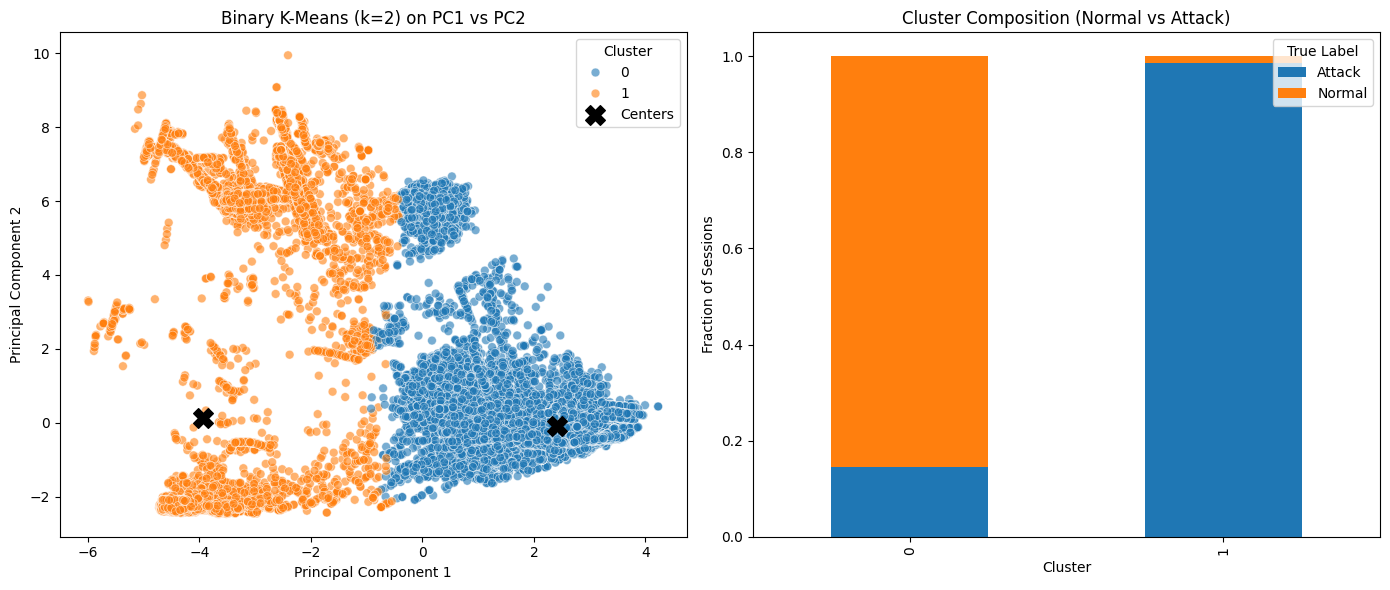

In [ ]:
# Visuals:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Scatter of PC1 vs PC2 colored by the two clusters
sns.scatterplot(
    x=X_pca[:, 0], y=X_pca[:, 1],
    hue=labels2,
    palette=["tab:blue", "tab:orange"],
    alpha=0.6,
    s=40,
    ax=ax1
)
# plot cluster centers
centers2 = km2.cluster_centers_
ax1.scatter(
    centers2[:, 0], centers2[:, 1],
    c="black", s=200, marker="X", label="Centers"
)
ax1.set_title("Binary K-Means (k=2) on PC1 vs PC2")
ax1.set_xlabel("Principal Component 1")
ax1.set_ylabel("Principal Component 2")
ax1.legend(title="Cluster")

# Stacked bar chart of cluster composition 
comp2.plot.bar(
    stacked=True,
    color=["tab:blue", "tab:orange"],
    ax=ax2
)
ax2.set_title("Cluster Composition (Normal vs Attack)")
ax2.set_xlabel("Cluster")
ax2.set_ylabel("Fraction of Sessions")
ax2.legend(title="True Label", loc="upper right")

plt.tight_layout()
plt.show()


Above we plot our two‐cluster solution in PCA space (left) and show how each cluster breaks down into Normal vs Attack (right):

| Scatter PC1 vs PC2 | Stacked Bar |
|:-----------------------------------------------------------:|:------------------------------------------------:|
| **PC1 vs PC2**: Each point is a network session, colored by its K-Means label. The two black “X”s mark the cluster centroids. | **Cluster Composition**: A stacked bar showing the fraction of Normal (orange) vs Attack (blue) sessions in each cluster. |

**Key takeaways:**
- **Cluster 0 → Normal**  
  - Centroid sits in the high‐density Normal region.  
  - Contains **85.4 %** true Normal sessions.  
  - **14.6 %** of Normal traffic is mis‐clustered as Attack.
- **Cluster 1 → Attack**  
  - Centroid aligns with the dense “malicious” cloud.  
  - Captures **98.6 %** of all Attack sessions.  
  - Only **1.4 %** of genuinely benign sessions fall here.

These visuals confirm our numeric metrics:  
we’ve found a reasonably clean split that catches nearly all attacks, at the cost of flagging ~15 % of benign traffic as anomalies.  

---

# 7. Segment Analysis:

### 1st Segmentation: Normal vs Attack

C:\Users\Basel\AppData\Local\Temp\ipykernel_19472\3340434809.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


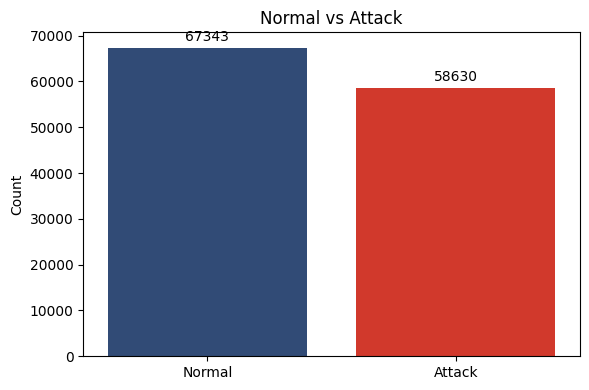

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.container import BarContainer

# draw the plot
fig, ax = plt.subplots(figsize=(6, 4))
sns.countplot(
    x=train_df['label'].apply(lambda x: 'Normal' if x=='normal' else 'Attack'),
    palette=["#254881", "#ec2210"],
    ax=ax
)

# titles and labels
ax.set_title('Normal vs Attack')
ax.set_xlabel('')
ax.set_ylabel('Count')

for container in ax.containers:
    if isinstance(container, BarContainer):
        ax.bar_label(container, fmt='%d', padding=3)

plt.tight_layout()
plt.show()


### 2nd Segmentation: Attack Categories

C:\Users\Basel\AppData\Local\Temp\ipykernel_19472\3730202059.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


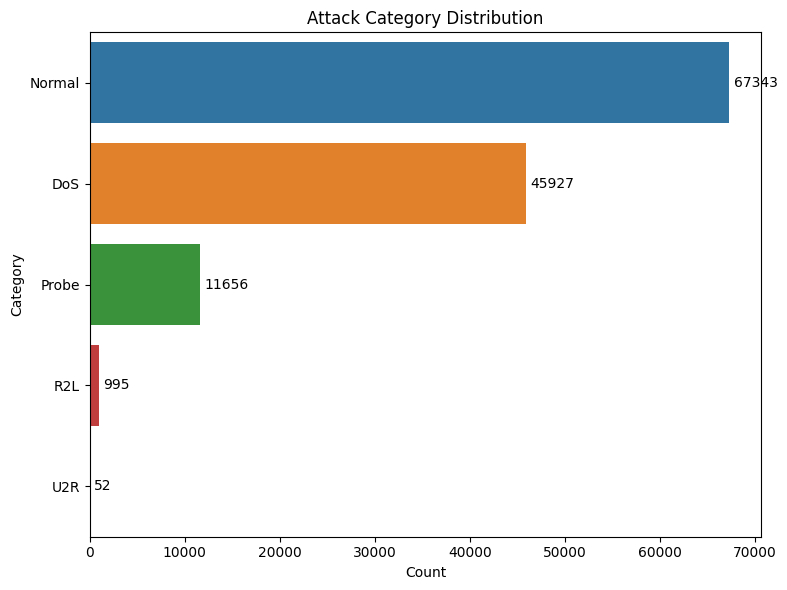

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.container import BarContainer

# draw the plot
fig, ax = plt.subplots(figsize=(8, 6))
order = train_df['attack_category'].value_counts().index
sns.countplot(
    y='attack_category',
    data=train_df,
    order=order,
    palette='tab10',
    ax=ax
)

# titles and labels
ax.set_title('Attack Category Distribution')
ax.set_xlabel('Count')
ax.set_ylabel('Category')

# annotate bars using bar_label
for container in ax.containers:
    if isinstance(container, BarContainer):
        ax.bar_label(container, fmt='%d', padding=3)

plt.tight_layout()
plt.show()


### 3rd Segmentation: Session Duration

C:\Users\Basel\AppData\Local\Temp\ipykernel_19472\825461034.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


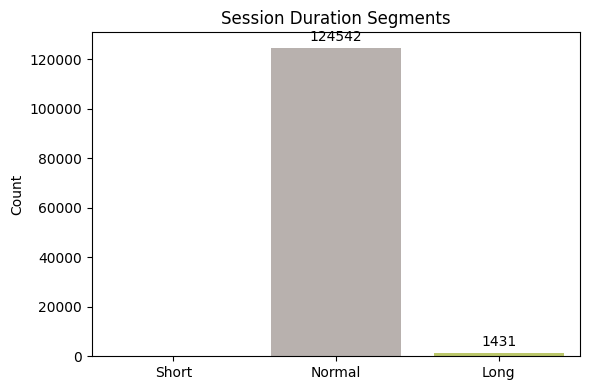

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.container import BarContainer

# compute duration segments
dur = train_df['duration']
mean_dur, std_dur = dur.mean(), dur.std()
thr_high = mean_dur + 3*std_dur
thr_low  = dur[dur > 0].quantile(0.01)

train_df['duration_segment'] = np.where(
    dur > thr_high, 'Long',
    np.where((dur > 0) & (dur < thr_low), 'Short', 'Normal')
)

# plot
fig, ax = plt.subplots(figsize=(6, 4))
sns.countplot(
    x='duration_segment',
    data=train_df,
    order=['Short', 'Normal', 'Long'],
    palette=['#e78ac3', '#bab0ac', '#c7d75a'],
    ax=ax
)
ax.set_title('Session Duration Segments')
ax.set_xlabel('')
ax.set_ylabel('Count')

# annotate bars with counts
for container in ax.containers:
    if isinstance(container, BarContainer):
        ax.bar_label(container, fmt='%d', padding=3)

plt.tight_layout()
plt.show()


### 4th Segmentation: Total-Bytes Buckets (src+dst)

C:\Users\Basel\AppData\Local\Temp\ipykernel_19472\283716419.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\Basel\AppData\Local\Temp\ipykernel_19472\283716419.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


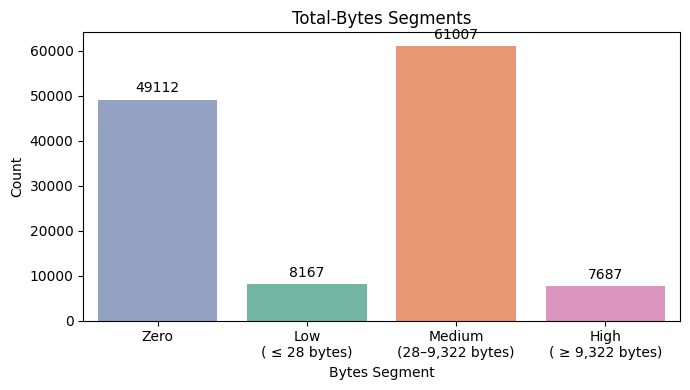

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.container import BarContainer

# Compute total bytes
train_df['total_bytes'] = train_df['src_bytes'] + train_df['dst_bytes']

# Percentiles on non-zero only
nonzero = train_df.loc[train_df['total_bytes'] > 0, 'total_bytes']
p10, p90 = np.percentile(nonzero, [10, 90])

# Bucket into Zero / Low / Medium / High
def byte_bucket(x):
    if x == 0:
        return 'Zero'
    elif x <= p10:
        return 'Low'
    elif x < p90:
        return 'Medium'
    else:
        return 'High'

train_df['bytes_segment'] = train_df['total_bytes'].map(byte_bucket)

# Plot
fig, ax = plt.subplots(figsize=(7, 4))
order = ['Zero','Low','Medium','High']
sns.countplot(
    x='bytes_segment',
    data=train_df,
    order=order,
    palette=['#8da0cb','#66c2a5','#fc8d62','#e78ac3'],
    ax=ax
)
ax.set_title('Total-Bytes Segments')
ax.set_ylabel('Count')
ax.set_xlabel('Bytes Segment')

# Annotate counts
for c in ax.containers:
    if isinstance(c, BarContainer):
        ax.bar_label(c, fmt='%d', padding=3)

# Tweak labels to show ranges
labels = [
    'Zero', 
    f"Low\n( ≤ {int(p10):,} bytes)", 
    f"Medium\n({int(p10):,}–{int(p90):,} bytes)", 
    f"High\n( ≥ {int(p90):,} bytes)"
]
ax.set_xticklabels(labels)

plt.tight_layout()
plt.show()


# Segmentation Summary

In this section, we applied **four distinct segmentation strategies** to analyze our NSL-KDD sessions. The results are detailed in the accompanying plots.

---

## 1. Normal vs Attack  
We split the dataset into **Normal** and **Attack** sessions.  
- **Normal:** 67,343 sessions  
- **Attack:** 58,630 sessions  

---

## 2. Attack Category Distribution  
Each session was labeled by attack type (or Normal):  
| Category | Count   |
| -------- | -------:|
| Normal   | 67,343  |
| DoS      | 45,927  |
| Probe    | 11,656  |
| R2L      |    995  |
| U2R      |     52  |

---

## 3. Session Duration Segments  
Sessions were categorized by duration into **Short**, **Normal**, and **Long** using the 1st percentile (low) and mean + 3σ (high) thresholds:  
| Segment | Count    |
| ------- | --------:|
| Short   |        0 |
| Normal  | 124,542  |
| Long    |   1,431  |

---

## 4. Total-Bytes Segments  
We computed `total_bytes = src_bytes + dst_bytes`, then bucketed into four groups:
- **Zero:** 49,112 sessions with 0 bytes  
- **Low:** 8,167 sessions (≤ 28 bytes)  
- **Medium:** 61,007 sessions (28 – 9,322 bytes)  
- **High:** 7,687 sessions (≥ 9,322 bytes)  

---

Each segmentation illuminates a different aspect of network behavior volume, duration, type, and normality,  
and the bar charts clearly show the size and thresholds of each segment.  


### Feature Profiling:

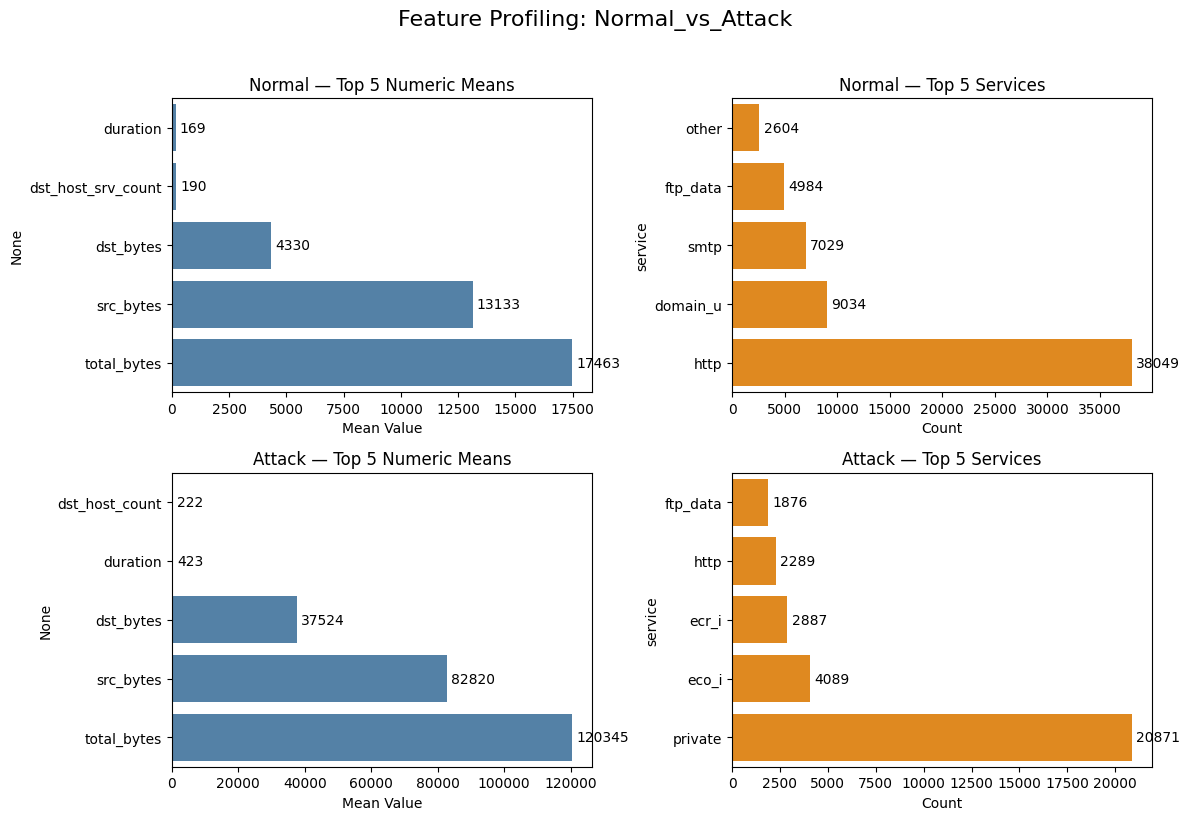

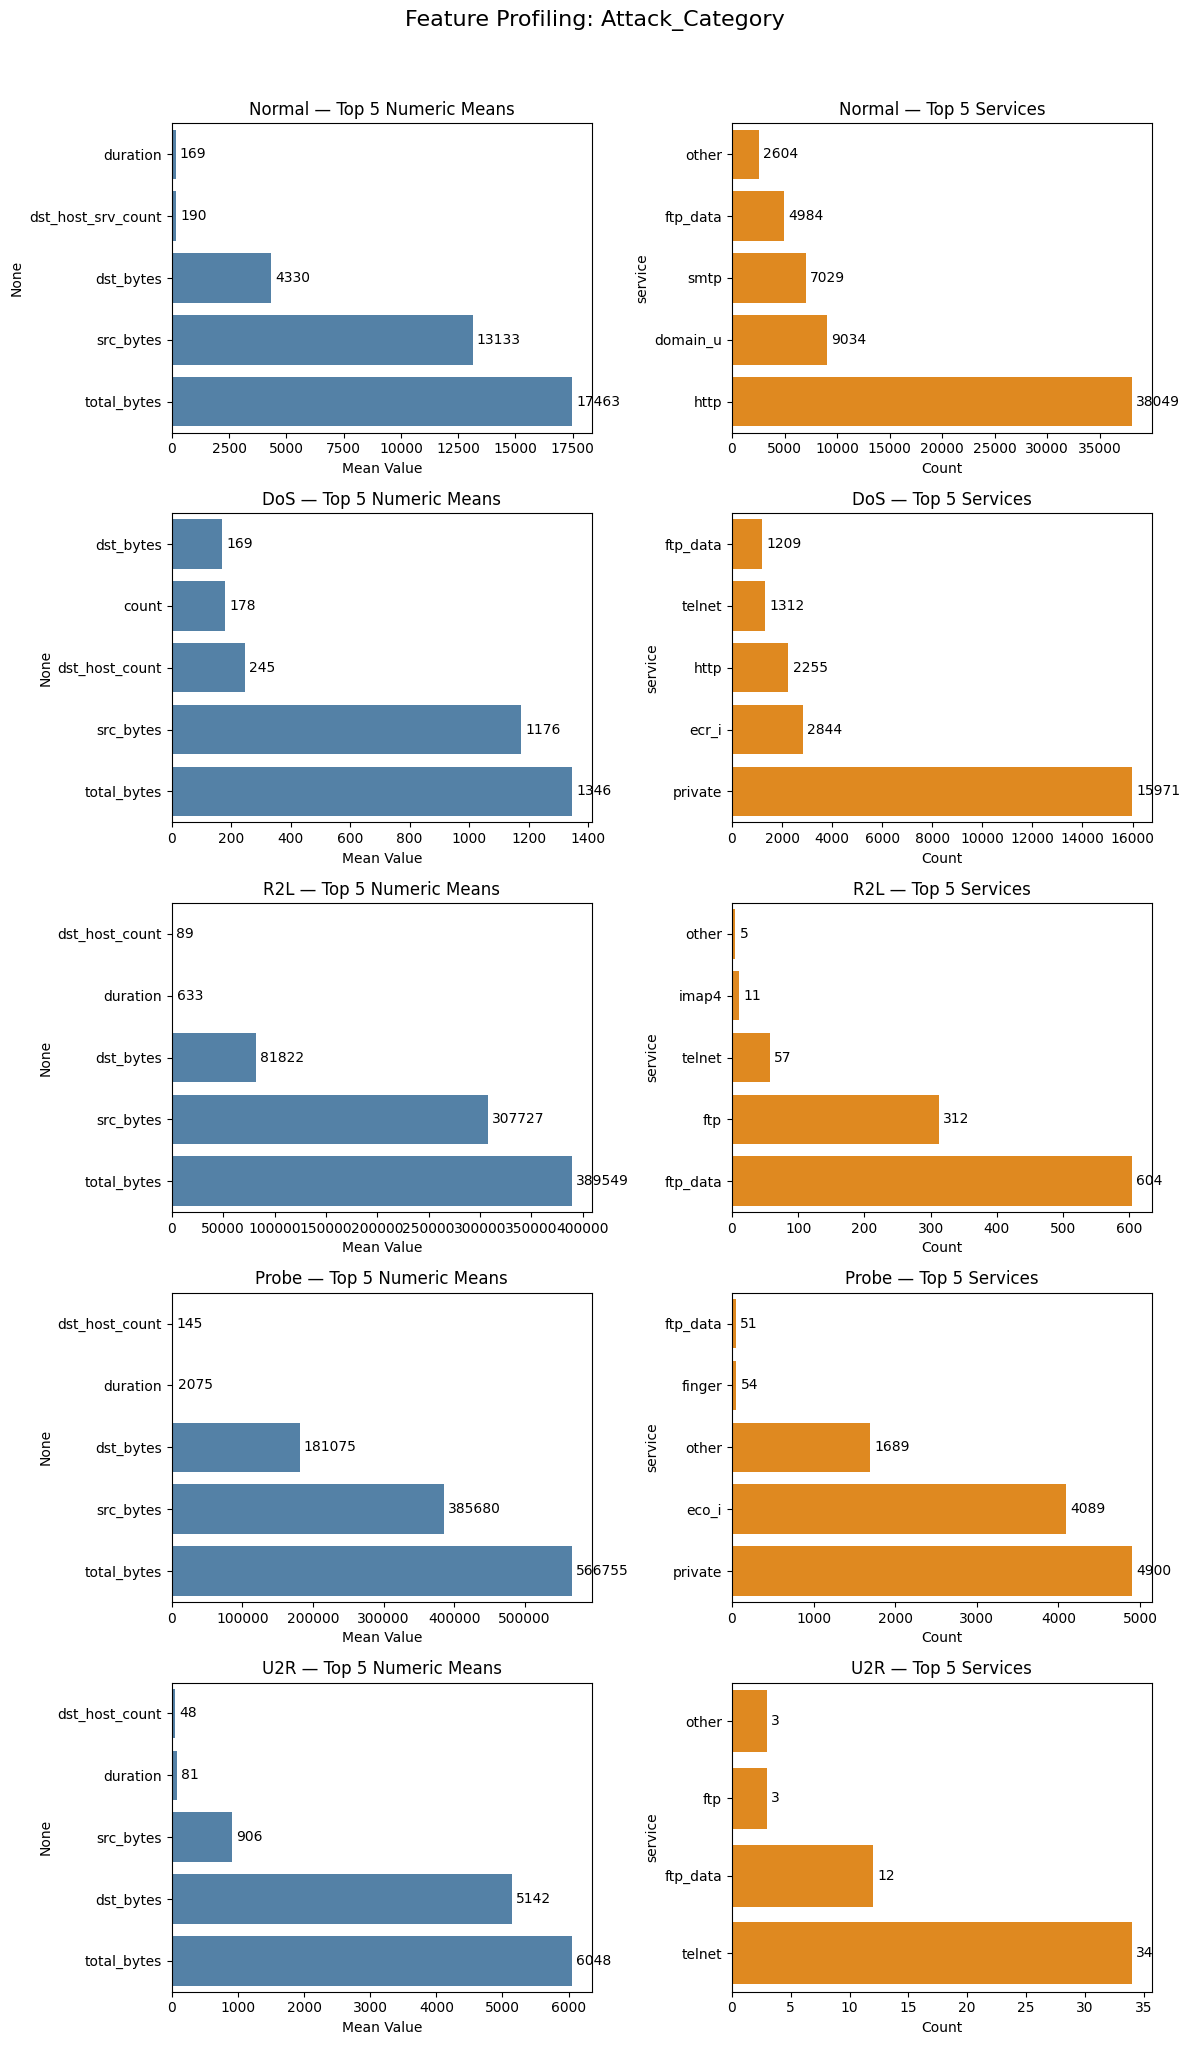

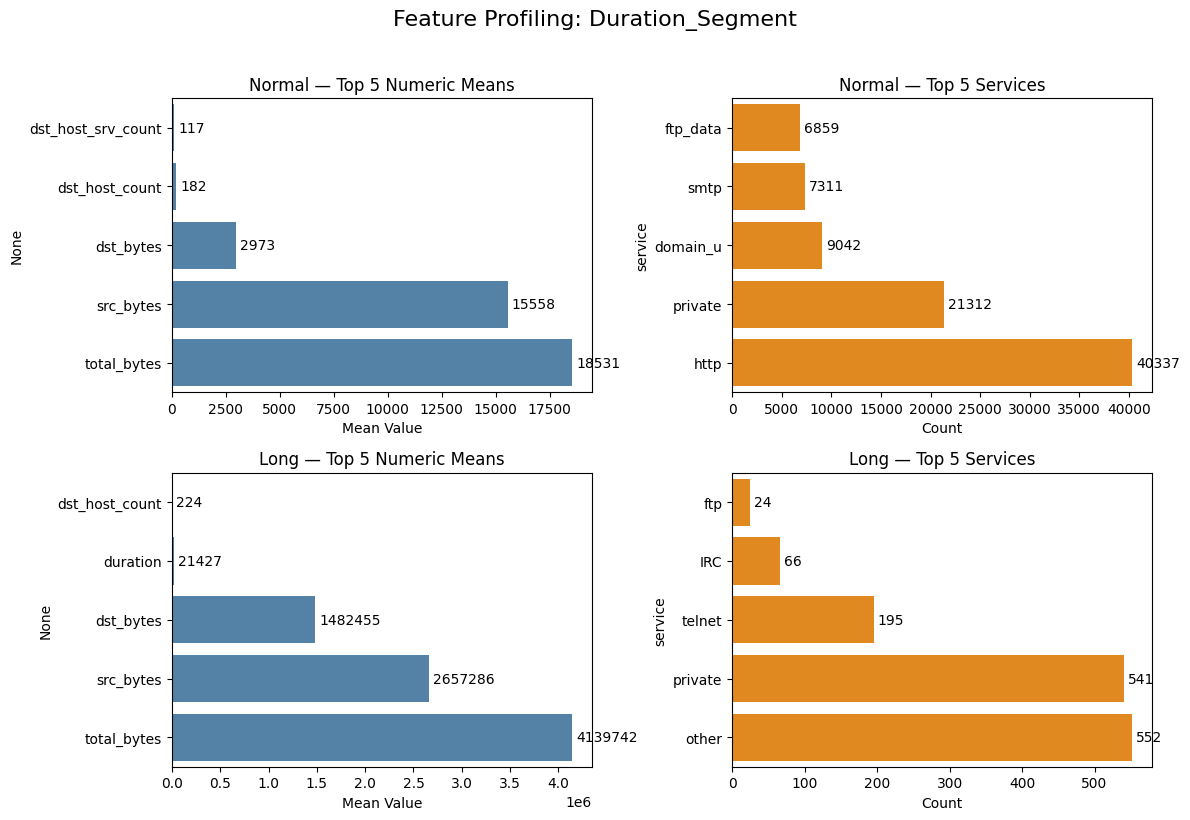

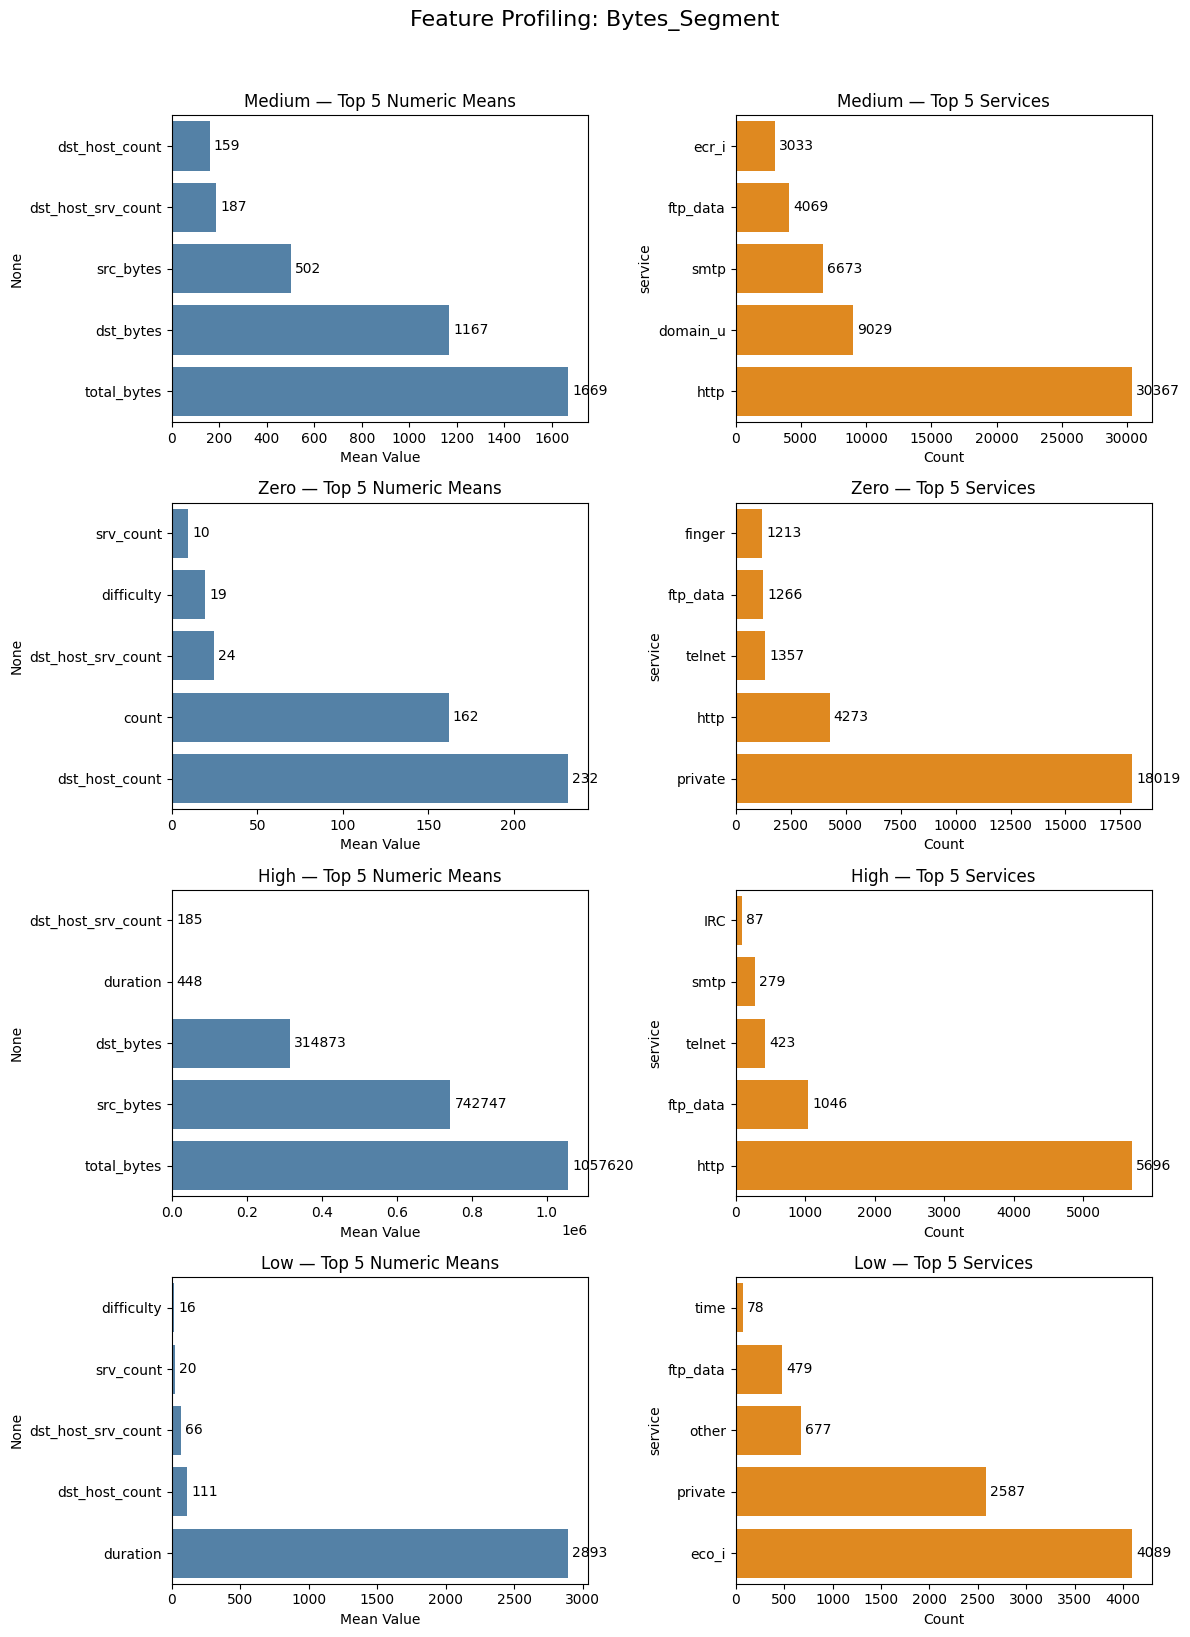

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

#  4 segmentations
segments = {
    'Normal_vs_Attack': train_df['label'].map(lambda x: 'Normal' if x=='normal' else 'Attack'),
    'Attack_Category':  train_df['attack_category'],
    'Duration_Segment': train_df['duration_segment'],
    'Bytes_Segment':    train_df['bytes_segment']
}

# numeric features to consider
numeric_cols = train_df.select_dtypes(include=['number']).columns.tolist()

for seg_name, seg_series in segments.items():
    df = train_df.copy()
    df['segment'] = seg_series
    seg_vals = df['segment'].unique()
    
    # prepare subplots
    fig, axes = plt.subplots(
        nrows=len(seg_vals), ncols=2, 
        figsize=(12, 4 * len(seg_vals)), 
        squeeze=False
    )
    fig.suptitle(f"Feature Profiling: {seg_name}", fontsize=16, y=1.02)
    
    for i, seg_val in enumerate(seg_vals):
        sub = df[df['segment'] == seg_val]
        
        # Top 5 numeric means
        means = sub[numeric_cols].mean().sort_values(ascending=False).head(5)
        ax0 = axes[i,0]
        sns.barplot(
            x=means.values, 
            y=means.index, 
            ax=ax0, 
            color='steelblue'
        )
        ax0.set_title(f"{seg_val} — Top 5 Numeric Means")
        ax0.set_xlabel("Mean Value")
        ax0.invert_yaxis()
        # annotate counts on bars
        for container in ax0.containers:
            ax0.bar_label(container, fmt='%.0f', padding=3)
        
        # Top 5 services
        svc = sub['service'].value_counts().head(5)
        ax1 = axes[i,1]
        sns.barplot(
            x=svc.values, 
            y=svc.index, 
            ax=ax1, 
            color='darkorange'
        )
        ax1.set_title(f"{seg_val} — Top 5 Services")
        ax1.set_xlabel("Count")
        ax1.invert_yaxis()
        # annotate counts on bars
        for container in ax1.containers:
            ax1.bar_label(container, fmt='%.0f', padding=3)
    
    plt.tight_layout()
    plt.show()


## Conclusion:  

### Normal vs Attack  
- Attack sessions move far more data on average than normal sessions (mean `total_bytes` ≈ 120 KB vs 17.5 KB).  
- Normal traffic is dominated by web/email services (`http`, `domain_u`, `smtp`), whereas attacks use specialized protocols (`private`, `eco_i`, `ecr_i`).  

**Domain Knowledge:**  
- **Web/email** activity should have moderate payloads and predictable session counts.  
- **Attack** traffic often uses obscure or backdoor services (`private`, `eco_i`) to evade detection.

---

### Attack Category Breakdown  
- **DoS:** many small repeated connections (`dst_host_count` high, mean `total_bytes` low), primarily on `private`.  
- **Probe:** moderate data per host but spread widely (`total_bytes` ≈ 567 KB, `dst_host_count` ≈ 239), often using `eco_i`.  
- **R2L/U2R:** large single-host payloads (mean `total_bytes` > 300 KB), carried over `ftp_data` or `telnet`.  

**Domain Knowledge:**  
- DoS floods saturate targets with small packets.  
- Port scanners (“Probe”) send moderate probes to many hosts.  
- R2L/U2R exploits upload tools (FTP, Telnet) to deliver payloads.

---

### Session Duration Segments  
- **Long** sessions last hours (median ≈ 4.8 h) and transfer massive volumes (`total_bytes` ≈ 4.1 MB), on services like `other` and `telnet`.  
- **Normal** durations cluster near zero but still carry tens of KB per session.  
- **Short** sessions (< 1 s) are absent in this split.  

**Domain Knowledge:**  
- Long‐duration channels often indicate backdoors or bulk exfiltration.  
- Very short (< 1 s) might be SYN scans—but none survive filtering here.

---

### Total-Bytes Segments  
- **Zero-byte** sessions (≈ 49 K) likely represent failed handshakes or pure-metadata probes.  
- **Low (≤ 28 B)** sessions (≈ 8 K) may be control or keepalive packets.  
- **Medium (28–9 322 B)** sessions (≈ 61 K) correspond to typical user activity (`http`, `domain_u`, `smtp`).  
- **High (≥ 9 322 B)** sessions (≈ 7.7 K) map to bulk transfers on `ftp_data` or `telnet`.  

**Domain Knowledge:**  
- Zero/low-byte flows often reflect network scans or protocol-level heartbeats.  
- High-byte sessions are classic indicators of data exfiltration or large file downloads.

---


## Temporal Component  
**Note:** The NSL-KDD dataset does **not** include any timestamp or time-of-day fields, so we are unable to analyze temporal patterns (e.g. hourly trends or session sequences) within these segments.  

---